## LoanTap

Loan Tap is an online platform committed to delivering customized loan products to millennials. They innovate in an otherwise dull loan segment, to deliver instant, flexible loans on consumer friendly terms to salaried professionals and businessmen. This case study aims analyse the dataset and provide crucial insights into the financial behaviors, 
spending habits, and potential risk associated with each borrowe, toan optimize loan disburs and , balancing customer outrea h
with risk management.

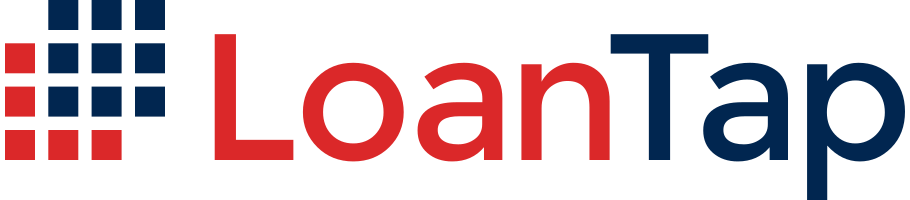

In [2]:
import pandas as pd
df=pd.read_csv("logistic_regression.csv")
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [3]:
x=df['emp_length'].str[:-5]
df['emp_length']=x
df["term"]=df["term"].str[:3]


# Import libraries

In [4]:
import numpy as np
import pandas as pd
import warnings
warnings.simplefilter("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Problem Statement:
Given a set of attributes for an Individual, determine if a credit line should be extended to them. If so, what should the repayment terms be in business recommendations?

# Tradeoff Questions:

How can we make sure that our modelis able ton detect real defaulterswithe less false positiv rates? This is important as we can lose out on an opportunity to finance more individuals and earn interest on it.

Since NPA (non-performing asset) is a real problem in this industry, it’s important we play safe and shouldn’t disburse loans to any.one

# Data dictionary:

- loan_amnt : The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
- term : The number of payments on the loan. Values are in months and can be either 36 or 60.
- int_rate : Interest Rate on the loan
- installment : The monthly payment owed by the borrower if the loan originates.
- grade : Institution assigned loan grade
- sub_grade : Institution assigned loan subgrade
- emp_title :The job title supplied by the Borrower when applying for the loan.*
- emp_length : Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
- home_ownership : The home ownership status provided by the borrower during registration or obtained from the credit report.
- annual_inc : The self-reported annual income provided by the borrower during registration.
- verification_status : Indicates if income was verified by Institution, not verified, or if the income source was verified
- issue_d : The month which the loan was funded
- loan_status : Current status of the loan - Target Variable
- purpose : A category provided by the borrower for the loan request.
- title : The loan title provided by the borrower
- dti : A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested - Institution loan, divided by the borrower’s self-reported monthly income.
- earliest_cr_line :The month the borrower's earliest reported credit line was opened
- open_acc : The number of open credit lines in the borrower's credit file.
- pub_rec : Number of derogatory public records
- revol_bal : Total credit revolving balance
- revol_util : Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
- total_acc : The total number of credit lines currently in the borrower's credit file
- initial_list_status : The initial listing status of the loan. Possible values are – W, F
- application_type : Indicates whether the loan is an individual application or a joint application with two co-borrowers
- mort_acc : Number of mortgage accounts.
-  pub_rec_bankruptcies : Number of public record bankruptcies
- Address: Address of the individual

# Observations on Data

In [5]:
df.shape

(396030, 27)

- Dataset has total number of rows=396030 and number of columns=27.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [7]:
df.isnull().sum(axis=0)

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

- emp_title, emp_length, title , revol_util, mort_acc and  pub_rec_bankruptcies are the columns having null values. 

In [8]:
df[["title","purpose"]]


,title,purpose
0,Vacation,vacation
1,Debt consolidation,debt_consolidation
2,Credit card refinancing,credit_card
3,Credit card refinancing,credit_card
4,Credit Card Refinance,credit_card
...,...,...
396025,Debt consolidation,debt_consolidation
396026,Debt consolidation,debt_consolidation
396027,pay off credit cards,debt_consolidation
396028,Loanforpayoff,debt_consolidation


In [9]:
#- Both title and purpose are similar columns so we can delete one, let's delete title.
df.drop("title",axis=1,inplace=True)
df["purpose"].value_counts()

purpose
debt_consolidation    234507
credit_card            83019
home_improvement       24030
other                  21185
major_purchase          8790
small_business          5701
car                     4697
medical                 4196
moving                  2854
vacation                2452
house                   2201
wedding                 1812
renewable_energy         329
educational              257
Name: count, dtype: int64

In [10]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


- Loan Amount, Installments, Annual Income , revol_bal, : all these columns have large differnece in mean and median . That means outliers are present in the data.

In [11]:
columns_type = df.dtypes

In [12]:
object_data_type= columns_type[columns_type=="object"]
len(object_data_type)

14

- 14 Non-numerical (categorical/date time) features present in the dataset.
- 27 -14=13 numerical features are there in the dataset.

In [13]:
df.describe(include="object") 

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,earliest_cr_line,initial_list_status,application_type,address
count,396030,396030,396030,373103,377729,396030,396030,396030,396030,396030,396030,396030,396030,396030
unique,2,7,35,173105,11,6,3,115,2,14,684,2,3,393700
top,36,B,B3,Teacher,10+,MORTGAGE,Verified,Oct-2014,Fully Paid,debt_consolidation,Oct-2000,f,INDIVIDUAL,USCGC Smith\r\nFPO AE 70466
freq,302005,116018,26655,4389,126041,198348,139563,14846,318357,234507,3017,238066,395319,8


In [14]:
df_col=list(df.columns)
df_col

['loan_amnt',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'purpose',
 'dti',
 'earliest_cr_line',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'application_type',
 'mort_acc',
 'pub_rec_bankruptcies',
 'address']

In [15]:
def value_count(column):
    return column.value_counts(normalize=True)
for col in df_col:
   print(value_count(df[col]))
   print("\n")
    

loan_amnt
10000.0    0.069863
12000.0    0.053950
15000.0    0.050256
20000.0    0.047898
35000.0    0.036805
             ...   
36225.0    0.000003
950.0      0.000003
37800.0    0.000003
30050.0    0.000003
725.0      0.000003
Name: proportion, Length: 1397, dtype: float64


term
 36    0.762581
 60    0.237419
Name: proportion, dtype: float64


int_rate
10.99    0.031339
12.99    0.024321
15.61    0.023609
11.99    0.021670
8.90     0.020248
           ...   
14.28    0.000003
18.72    0.000003
18.36    0.000003
30.84    0.000003
24.59    0.000003
Name: proportion, Length: 566, dtype: float64


installment
327.34     0.002444
332.10     0.001997
491.01     0.001858
336.90     0.001732
392.81     0.001725
             ...   
364.37     0.000003
1015.29    0.000003
398.04     0.000003
544.94     0.000003
572.44     0.000003
Name: proportion, Length: 55706, dtype: float64


grade
B    0.292953
C    0.267624
A    0.162076
D    0.160402
E    0.079509
F    0.029725
G    0.007712
Name: pr

In [16]:
# Q1 What percentage of customers have fully paid their Loan Amount?
value_count(df["loan_status"])

loan_status
Fully Paid     0.803871
Charged Off    0.196129
Name: proportion, dtype: float64

- Q1 What percentage of customers have fully paid their Loan Amount?
-Ans - 80.38%

In [17]:
# Q 5 Name the top 2 afforded job titles.
value_count(df["emp_title"])

emp_title
Teacher                    0.011764
Manager                    0.011391
Registered Nurse           0.004974
RN                         0.004948
Supervisor                 0.004905
                             ...   
Postman                    0.000003
McCarthy & Holthus, LLC    0.000003
jp flooring                0.000003
Histology Technologist     0.000003
Gracon Services, Inc       0.000003
Name: proportion, Length: 173105, dtype: float64

- Ans: Teacher and Manager

In [18]:
# Q3 The majority of people have home ownership as _______.
value_count(df["home_ownership"])

home_ownership
MORTGAGE    0.500841
RENT        0.403480
OWN         0.095311
OTHER       0.000283
NONE        0.000078
ANY         0.000008
Name: proportion, dtype: float64

- Q 3 The majority of people have home ownership as MORTGAGE.

In [19]:
# Percentage of other, none and any are very low. We can merge them together as Mortagage.
df["home_ownership"].replace({"ANY":"MORTGAGE",
                             "NONE":"MORTGAGE","OTHER": "MORTGAGE"},
                            inplace=True)

In [20]:
# Q9  Will the results be affected by geographical location? (Yes/No)

<Axes: xlabel='address_pin_code', ylabel='count'>

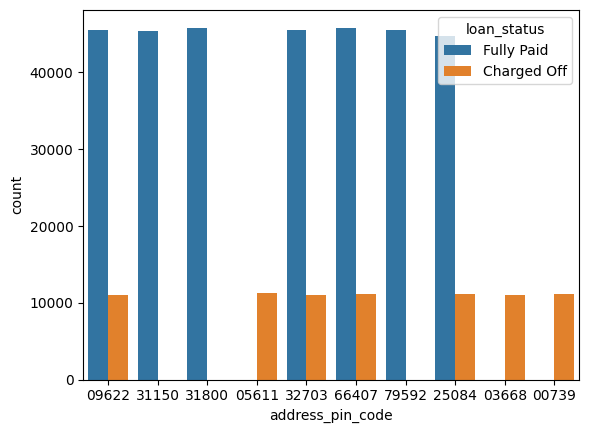

In [21]:
df["address_pin_code"]=df["address"].str[-1:-6:-1]
sns.countplot(x=df["address_pin_code"],data=df,hue="loan_status")

-Ans In the specified areas with pin codes (31150, 31800,79592), there are no instances of charged-off cases among borrowers. However, in the locations represented by pin codes (05611, 03668, 00739), all borrowers are charged-offs. In the remaining areas, with the pin codes (09622, 32703, 66407, 25084), the ratios of charged-off and fully paid cases are nearly identical.

Yes, the results are affected by geographical location.

In [22]:
# Drop the address col which is object type and go with address_pin_code column.
df.drop("address",axis=1,inplace=True)


# Data type conversion 

In [23]:
# Converting non decimal numeric values as integer datatype.
numeric_nonnull_columns=["open_acc","pub_rec","total_acc"]
def data_int_type(col):
     return col.astype("int64")
for col in numeric_nonnull_columns:
     df[col]=data_int_type(df[col])
     print(data_int_type(df[col]))
     print("\n")
    

0         16
1         17
2         13
3          6
4         13
          ..
396025     6
396026     6
396027    15
396028     9
396029     3
Name: open_acc, Length: 396030, dtype: int64


0         0
1         0
2         0
3         0
4         0
         ..
396025    0
396026    0
396027    0
396028    0
396029    0
Name: pub_rec, Length: 396030, dtype: int64


0         25
1         27
2         26
3         13
4         43
          ..
396025    23
396026     8
396027    23
396028    20
396029    19
Name: total_acc, Length: 396030, dtype: int64




In [24]:
# Converting date type data in datetime format
df['issue_d'] = pd.to_datetime(df['issue_d'])
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'])

In [25]:
# Coverting object datatype data into categorical datatype to optimize the performance.
pd.Series(object_data_type).index
categorical_data=['term', 'grade', 'sub_grade', 'emp_title', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'initial_list_status', 'application_type',"address_pin_code"]
def data_cat_type(col):
     return col.astype("category")
for col in categorical_data:
     df[col]=data_cat_type(df[col])
     print(data_cat_type(df[col]))
     print("\n")
    

0          36
1          36
2          36
3          36
4          60
         ... 
396025     60
396026     36
396027     36
396028     60
396029     36
Name: term, Length: 396030, dtype: category
Categories (2, object): [' 36', ' 60']


0         B
1         B
2         B
3         A
4         C
         ..
396025    B
396026    C
396027    B
396028    C
396029    C
Name: grade, Length: 396030, dtype: category
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']


0         B4
1         B5
2         B3
3         A2
4         C5
          ..
396025    B4
396026    C1
396027    B1
396028    C2
396029    C2
Name: sub_grade, Length: 396030, dtype: category
Categories (35, object): ['A1', 'A2', 'A3', 'A4', ..., 'G2', 'G3', 'G4', 'G5']


0                        Marketing
1                  Credit analyst 
2                     Statistician
3                  Client Advocate
4          Destiny Management Inc.
                    ...           
396025            licensed bankere
3960

# Univariate Analysis

In [26]:
categorical_data

['term',
 'grade',
 'sub_grade',
 'emp_title',
 'home_ownership',
 'verification_status',
 'loan_status',
 'purpose',
 'initial_list_status',
 'application_type',
 'address_pin_code']

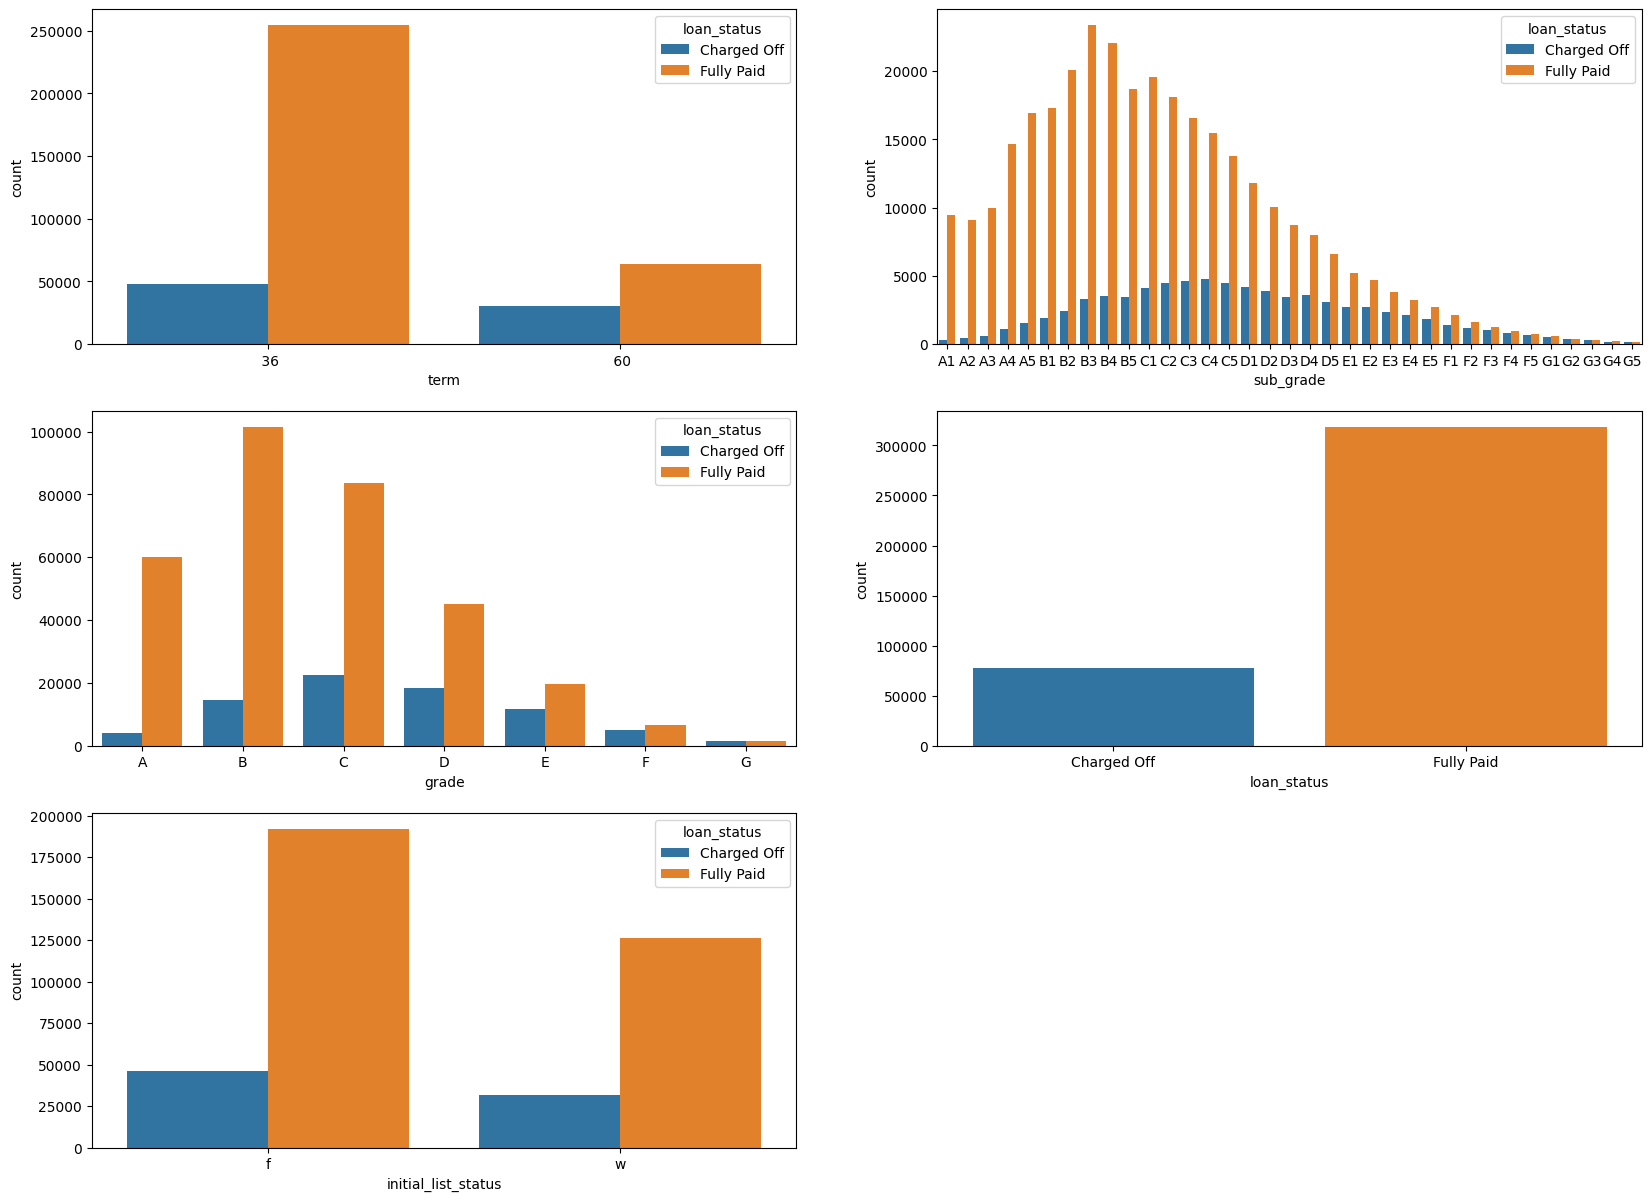

In [27]:
Discrete1_randon_variablecolumns=["term",'sub_grade','grade',"loan_status","initial_list_status"]
count=0
plt.figure(figsize=(20,20))
for col in Discrete1_randon_variablecolumns:
       count+=1  
       plt.subplot(4,2,count)
       sns.countplot(data=df,x=df[col],hue="loan_status")

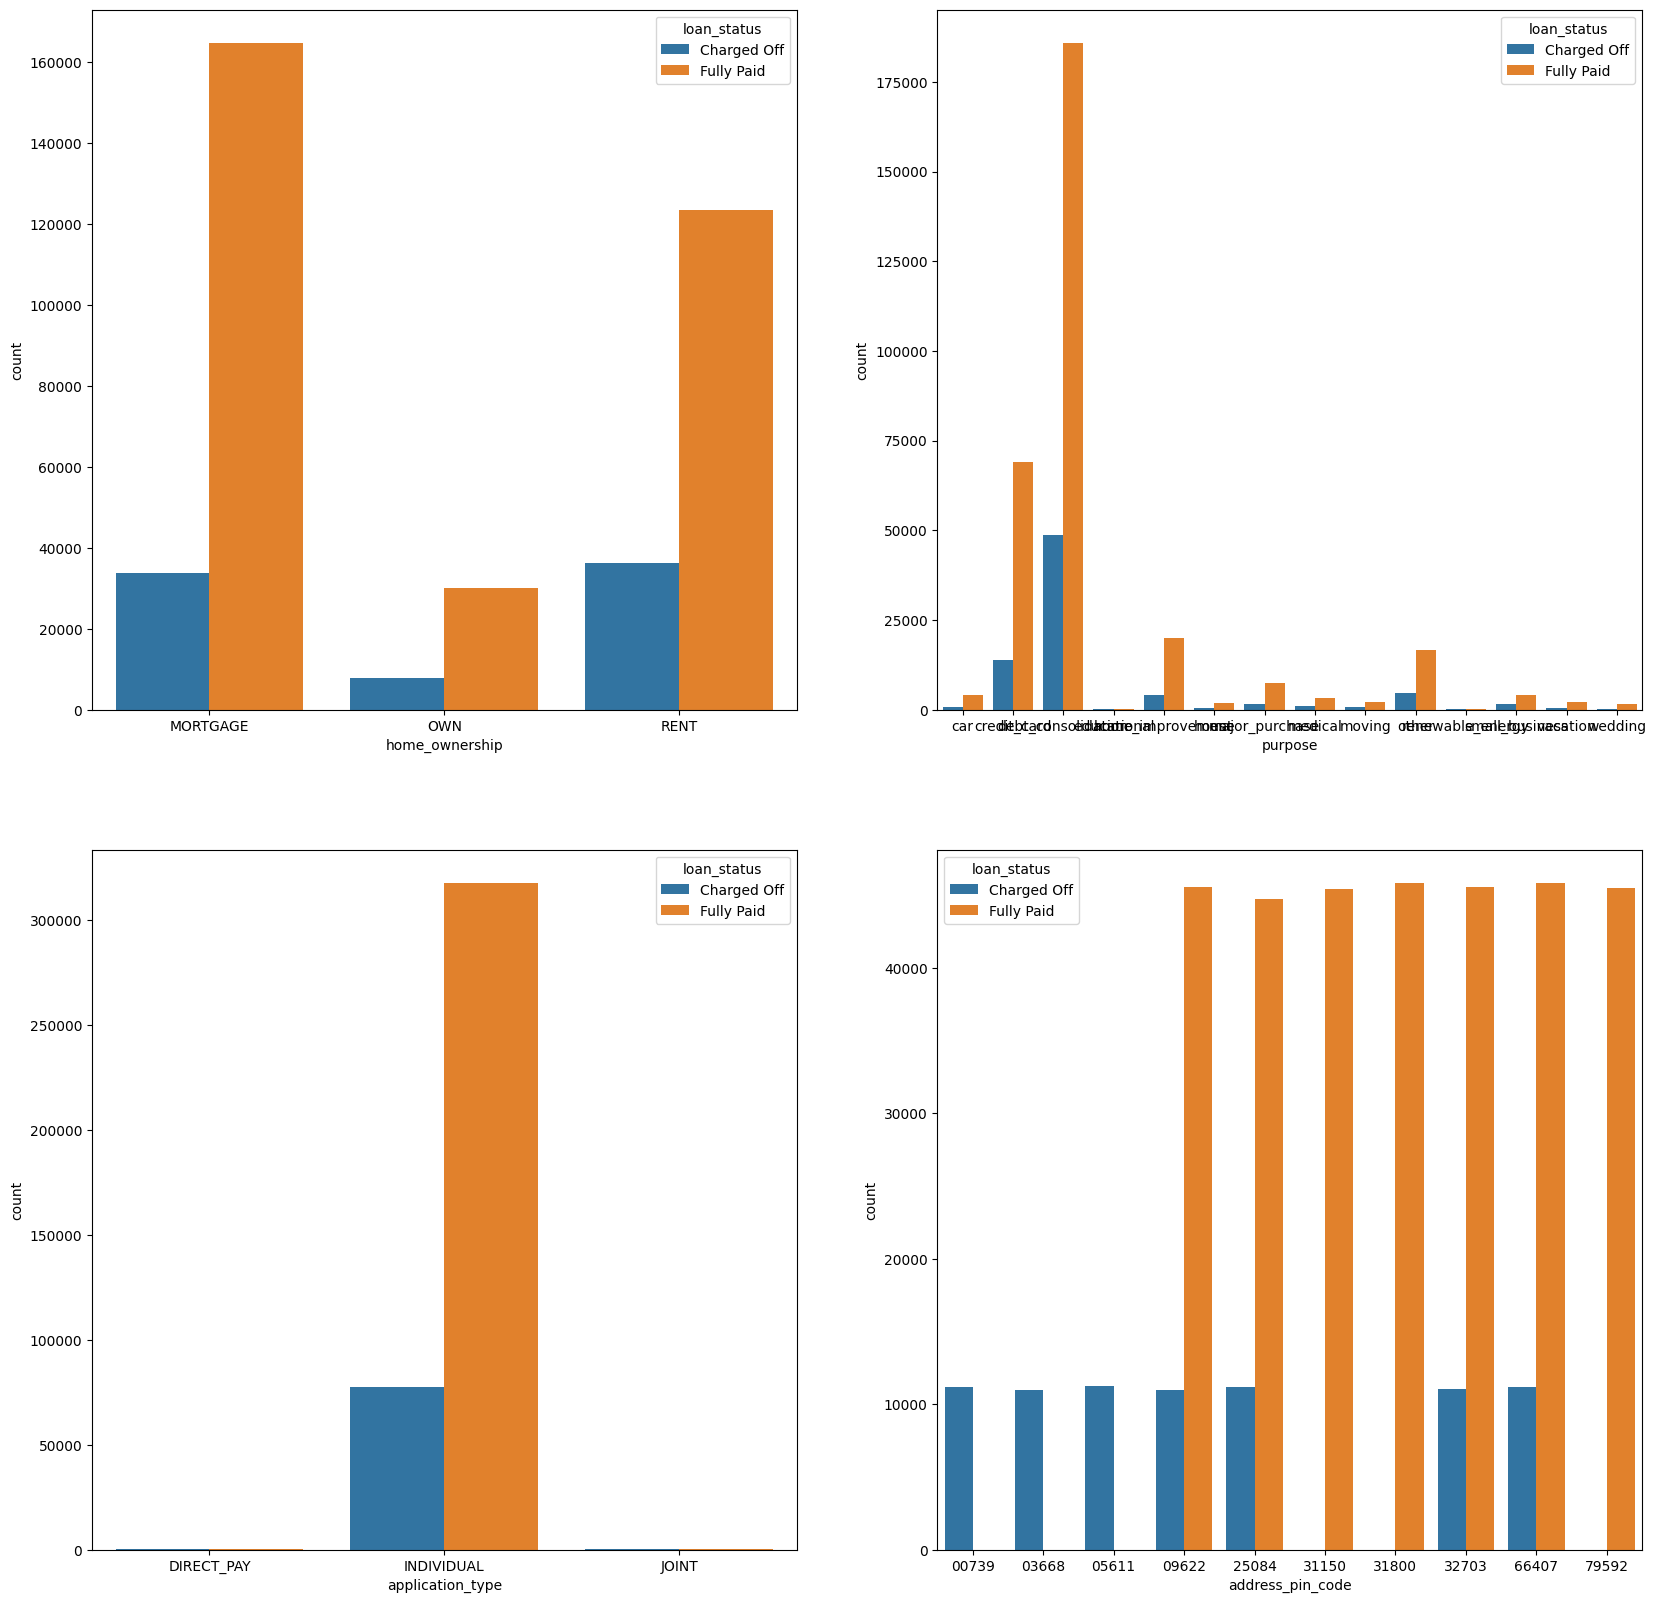

In [27]:
Discrete2_randon_variablecolumns=['home_ownership','purpose','application_type','address_pin_code']
count=0
plt.figure(figsize=(20,20))
for col in Discrete2_randon_variablecolumns:
       count+=1  
       plt.subplot(2,2,count)
       sns.countplot(data=df,x=df[col],hue="loan_status")

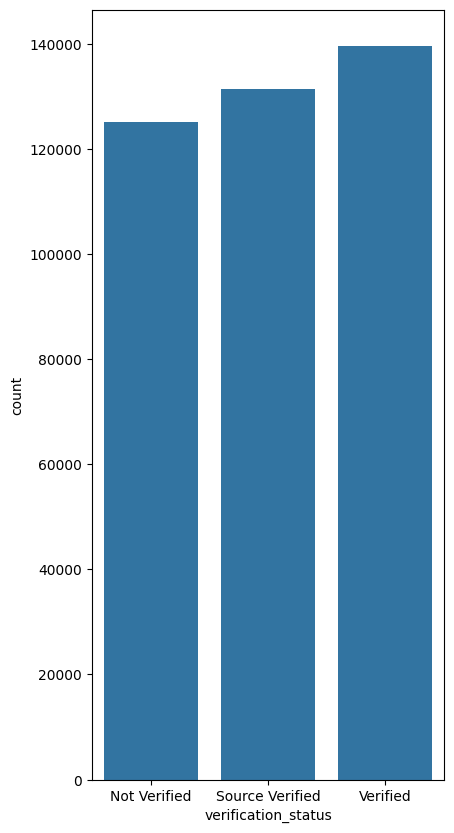

In [28]:
Discrete3_randon_variablecolumns=['verification_status']# emp_ttitle is cfreating issue in plotting, may be due more numbers of categories
count=0
plt.figure(figsize=(10,10))
for col in Discrete3_randon_variablecolumns:
       count+=1  
       plt.subplot(1,2,count)
       sns.countplot(data=df,x=df[col])

In [29]:
df["purpose"].value_counts(normalize=True)

purpose
debt_consolidation    0.592145
credit_card           0.209628
home_improvement      0.060677
other                 0.053493
major_purchase        0.022195
small_business        0.014395
car                   0.011860
medical               0.010595
moving                0.007207
vacation              0.006191
house                 0.005558
wedding               0.004575
renewable_energy      0.000831
educational           0.000649
Name: proportion, dtype: float64

- 75% of borrowers's term period is 36 months. 83.3% are fully paid out of 75%.
- Top 2 risk grade assigned by LoanTap is B and C.
- The ratio of fully paid to charged off is nearly identical for both "W" and "F," indicating that this factor has minimal influence on the overall     loan status for these categories. We can drop this column from the dataset.
- Top homeownership status of fully paid off borrowers is Mortgage while it is Rent for charged off.
- Debt_consolidation (0.592145) and 
credit_cardpayment ( 0.20962) [almost 80% of borrowers] are top most purpose of loan. 8
- Top application's type for both categories is Individual.
- In the specified areas with pin codes (31150, 31800), there are no instances of charged-off cases among borrowers. However, in the locations represented by pin codes (05611, 03668, 00739), all borrowers are charged-offs. In the remaining areas, with the pin codes (09622, 32703, 66407, 25084), the ratios of charged-off and fully paid cases are nearly identical Tthe results are affected by geographical location.
- Most of the borrowers are verified or source verified.
- We can see, there is an imbalance in the data.   
80% belongs to the class 0 : which is loan fully paid
  .   
20% belongs to the class 1 : whicis loanre charged off.

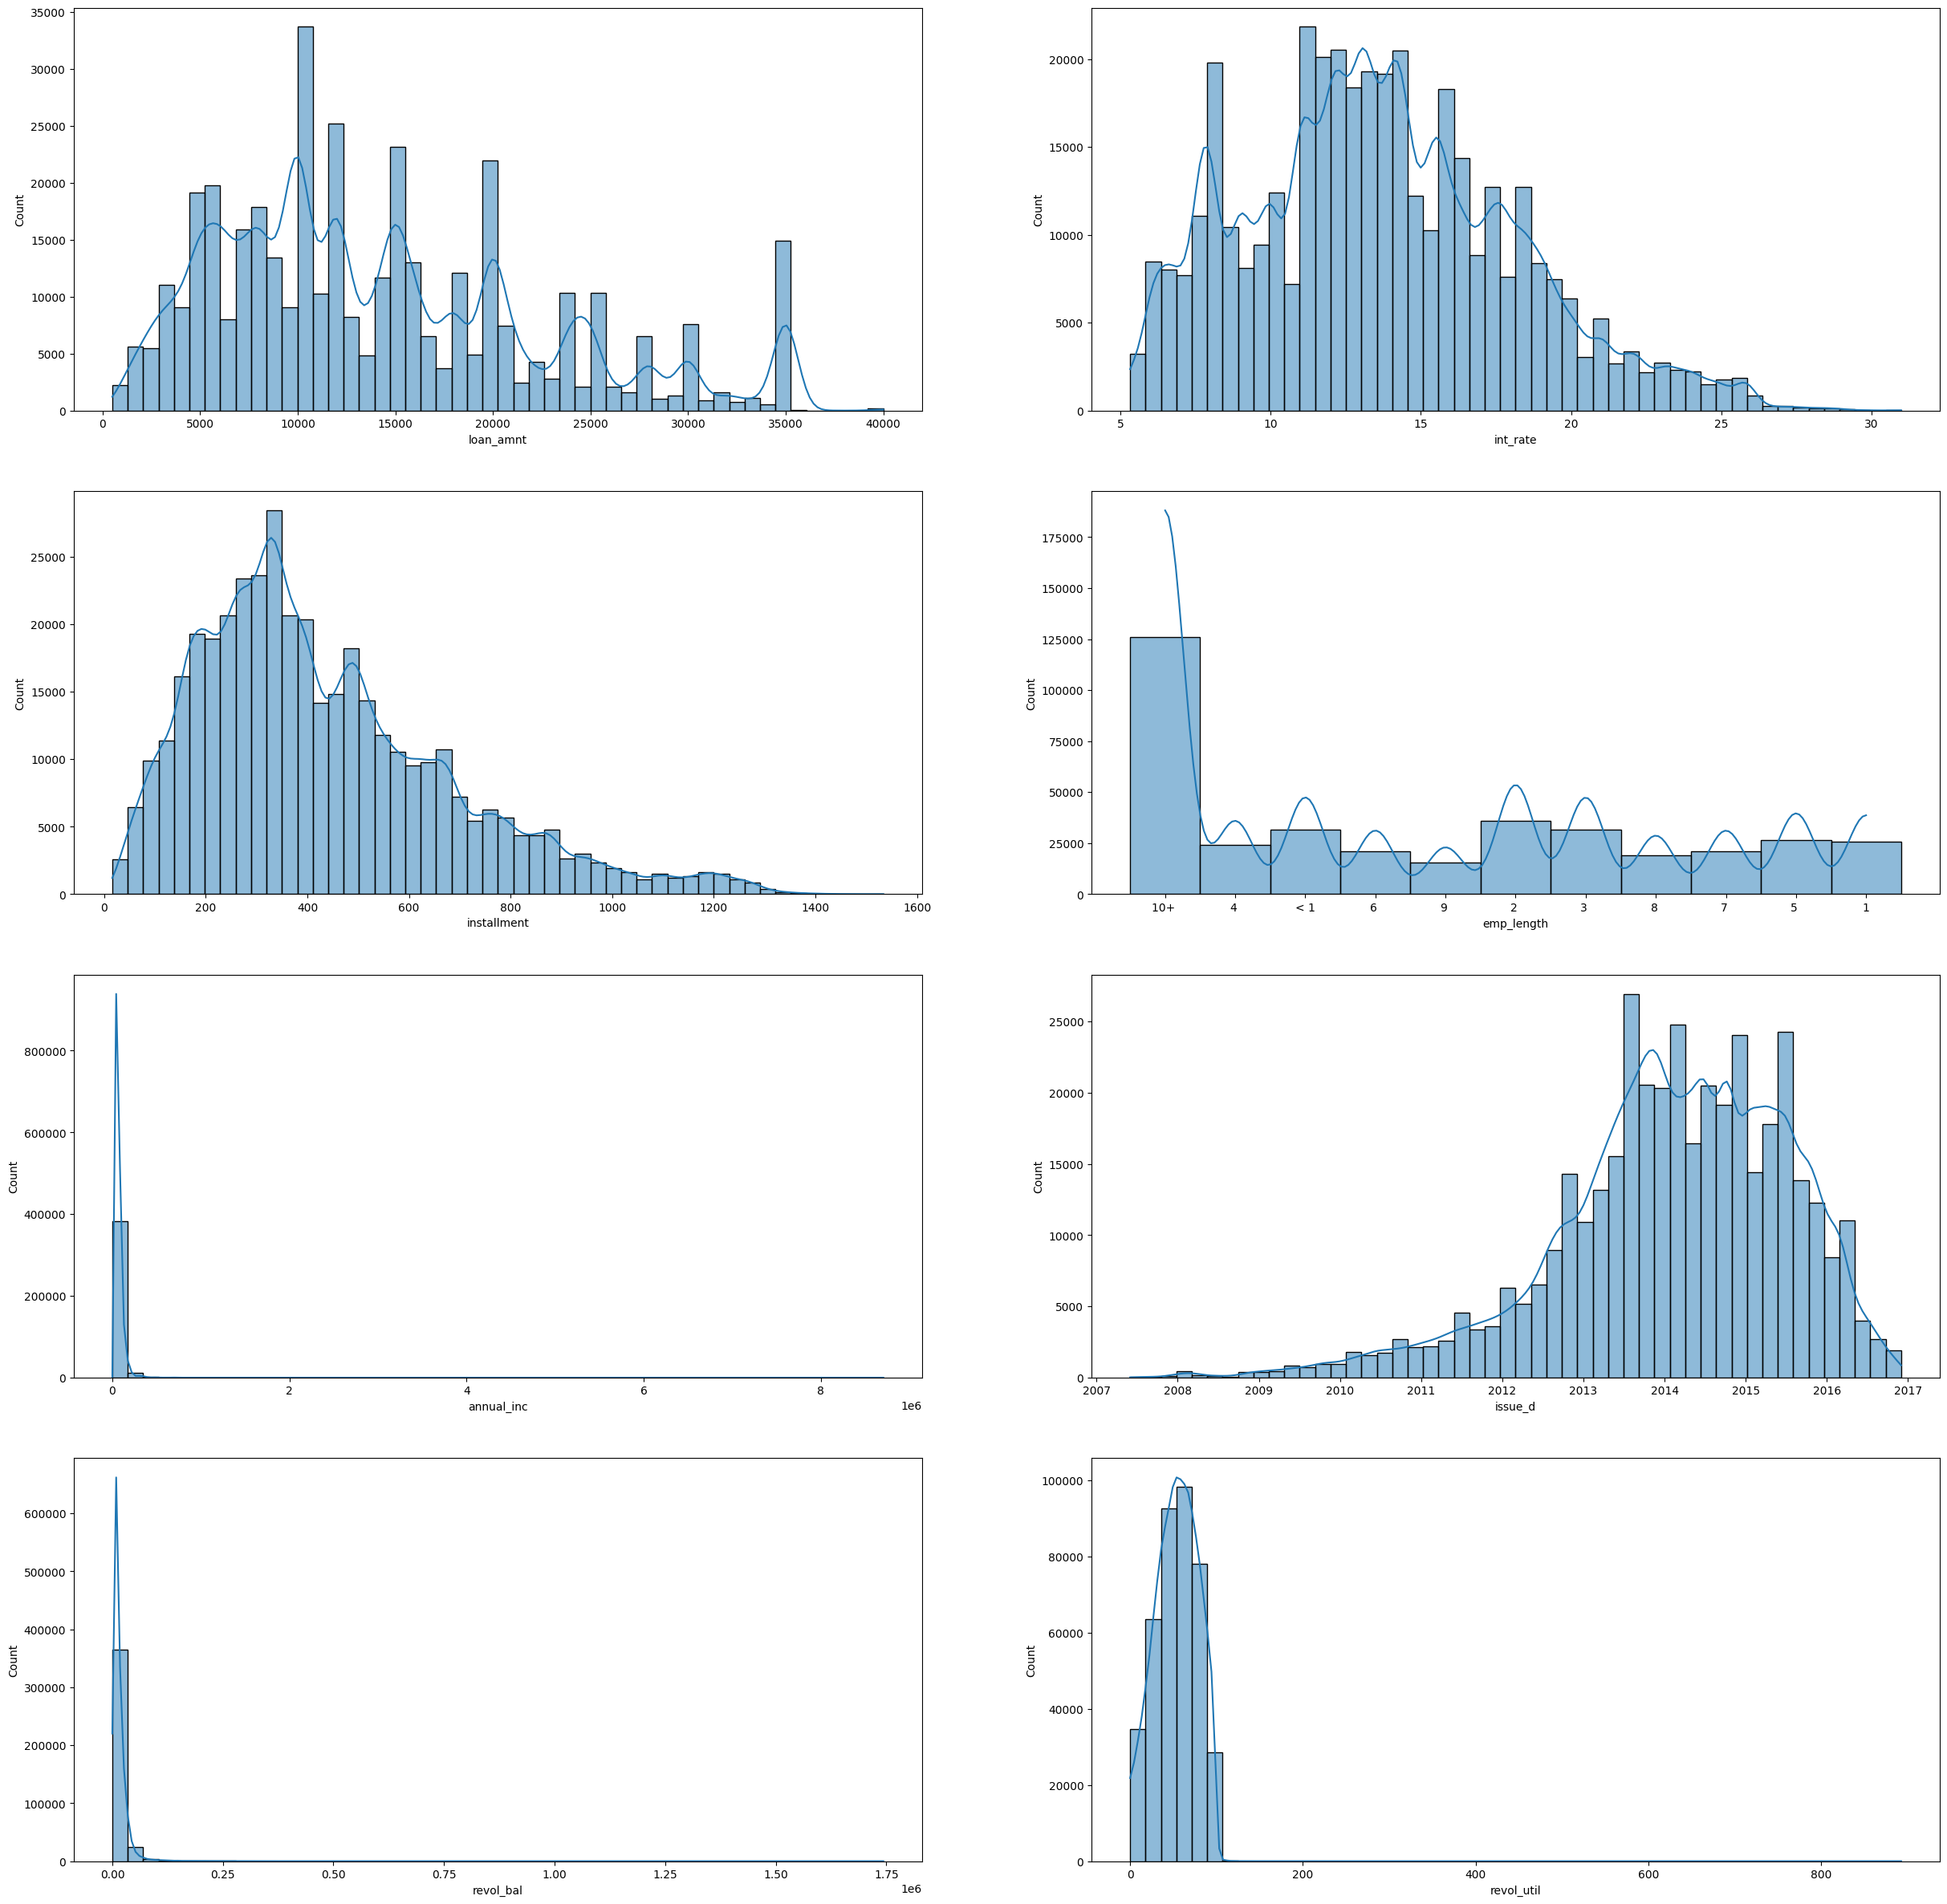

In [30]:
continuous1_randam_variable=['loan_amnt',  'int_rate', 'installment', 'emp_length',  'annual_inc', 'issue_d', 'revol_bal',"revol_util"]
count=0
plt.figure(figsize=(30,30))
for col in continuous1_randam_variable:
       count+=1  
       plt.subplot(4,2,count)
       sns.histplot(data=df,x=df[col],bins=50,kde=True)

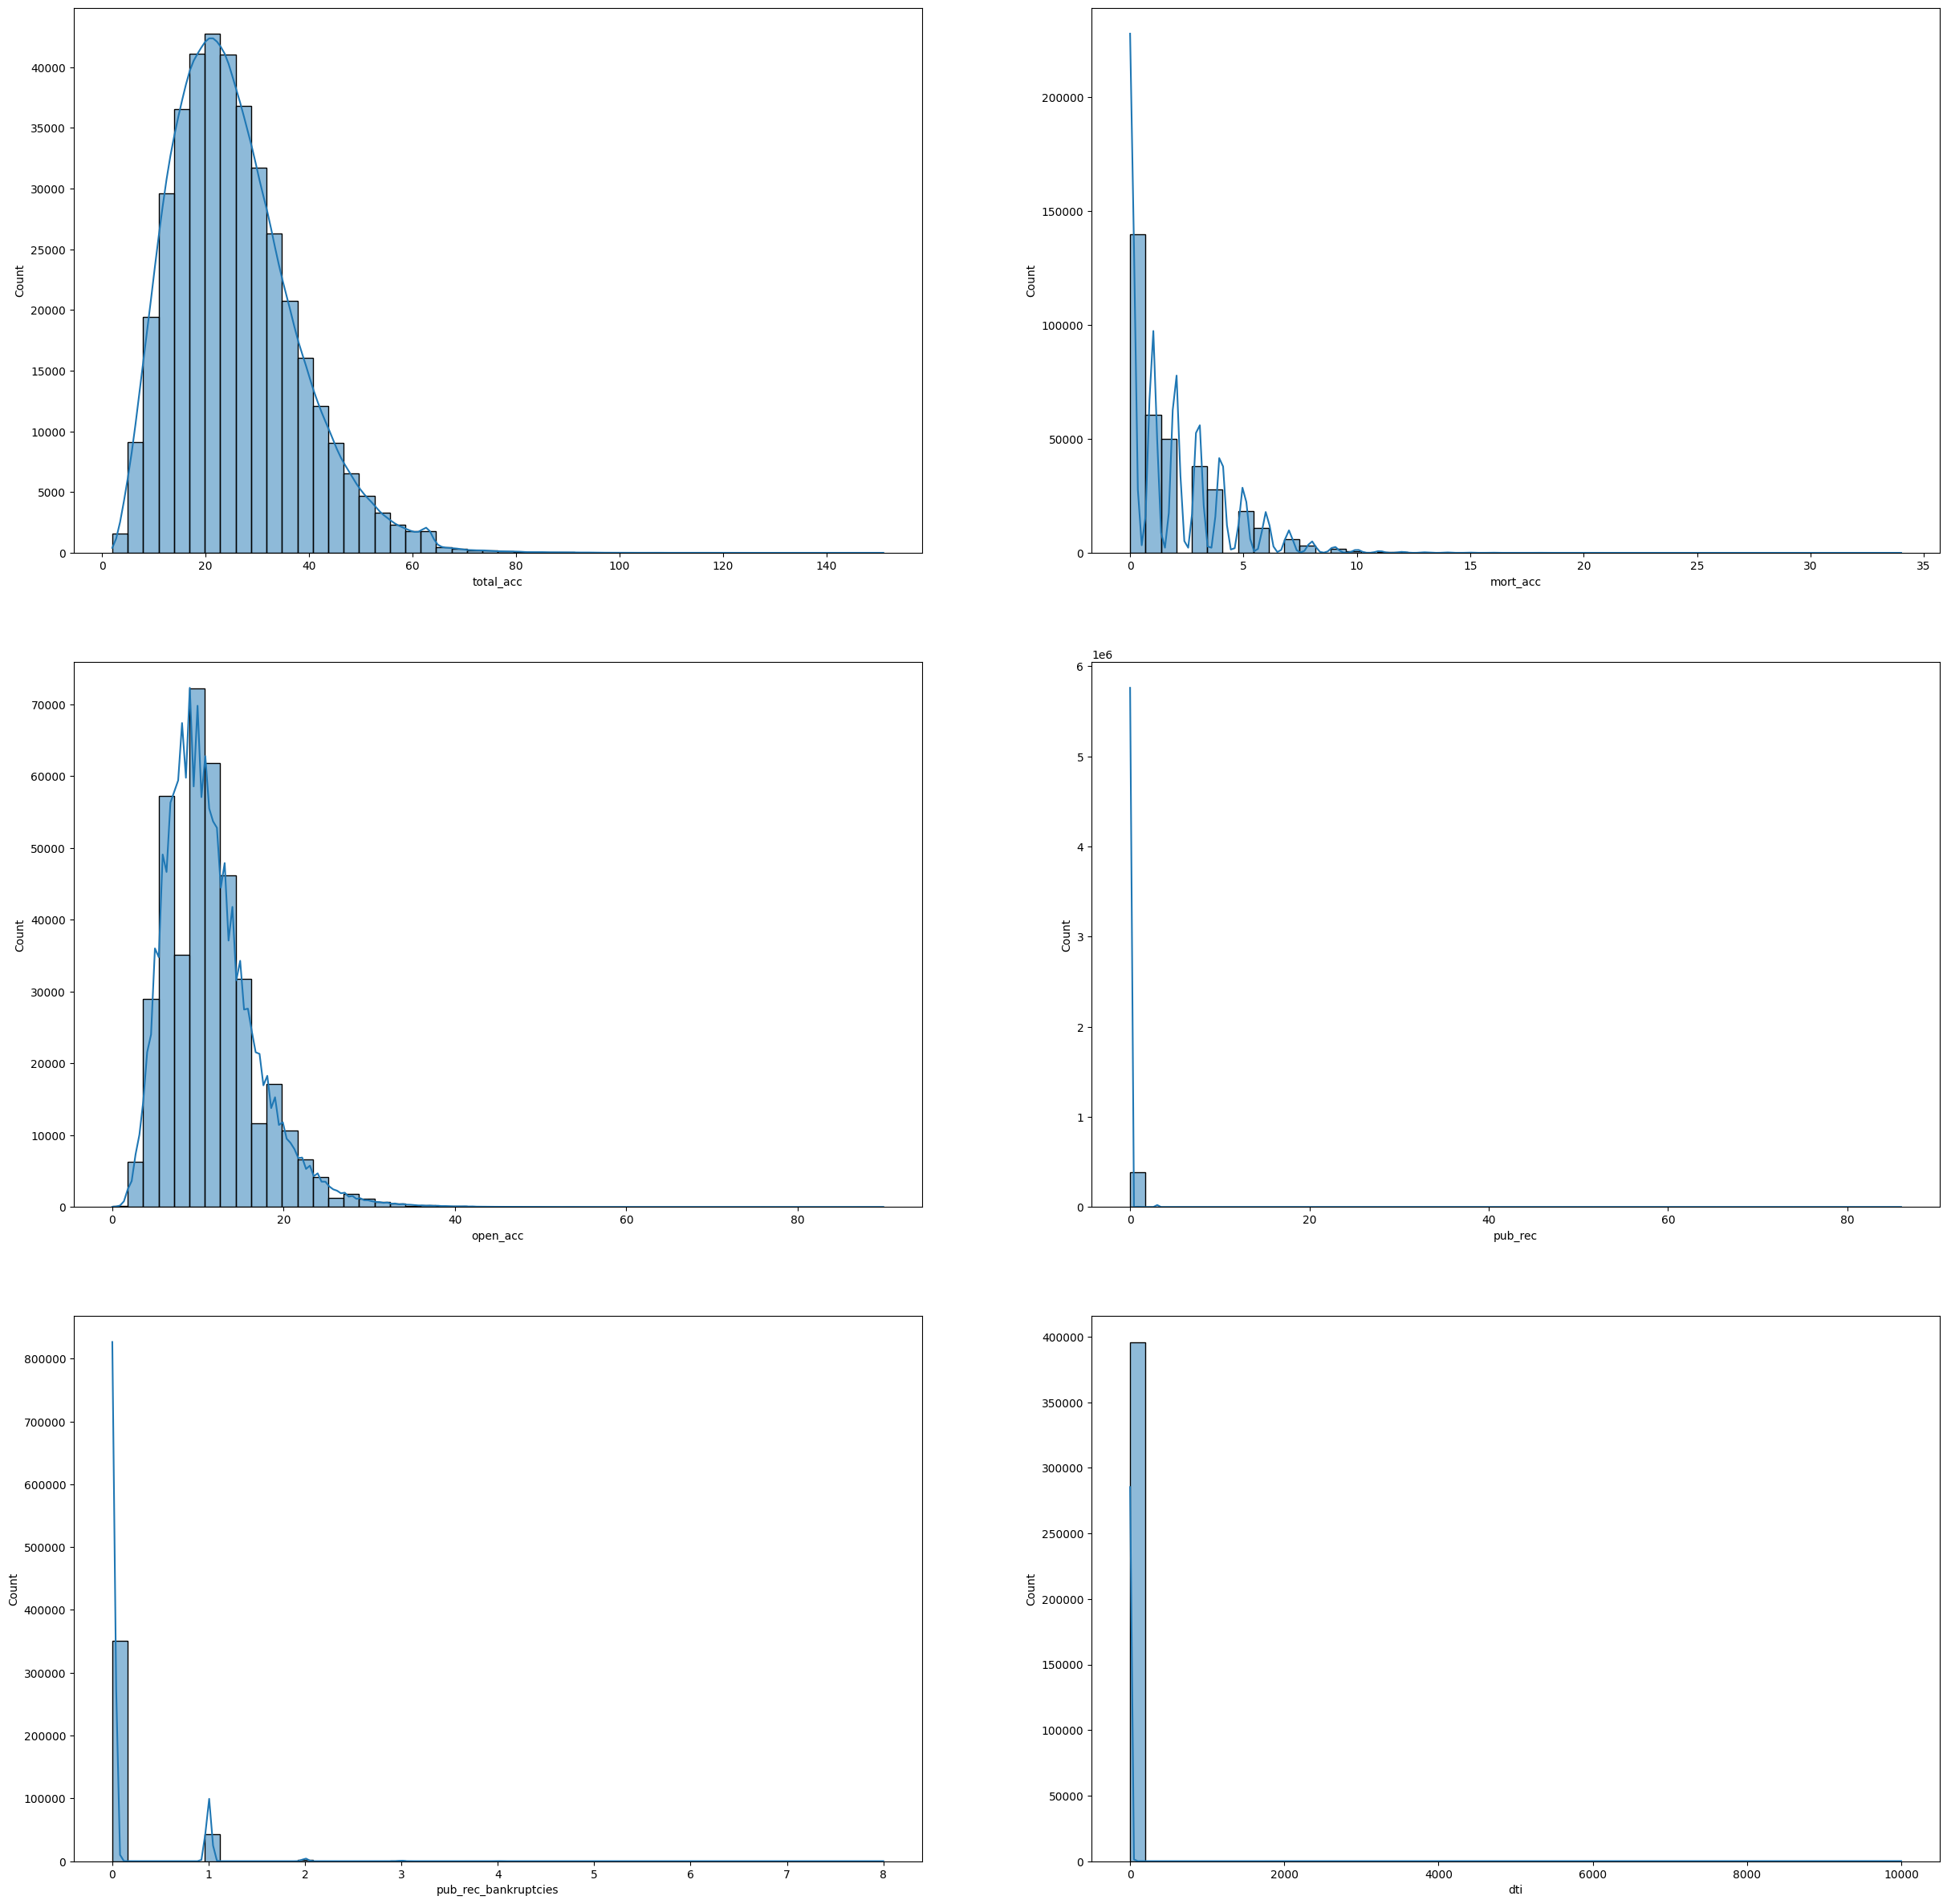

In [31]:
continuous2_randam_variable=['total_acc', 'mort_acc','open_acc', 'pub_rec','pub_rec_bankruptcies', 'dti']
count=0
plt.figure(figsize=(30,30))
for col in continuous2_randam_variable:
       count+=1  
       plt.subplot(3,2,count)
       sns.histplot(data=df,x=df[col],bins=50,kde=True)

- From the above plots, we observed that most of the features have outliers and need to be treated: the best is IQR detection.

# Bivariate Analysis

<Axes: xlabel='loan_amnt', ylabel='emp_length'>

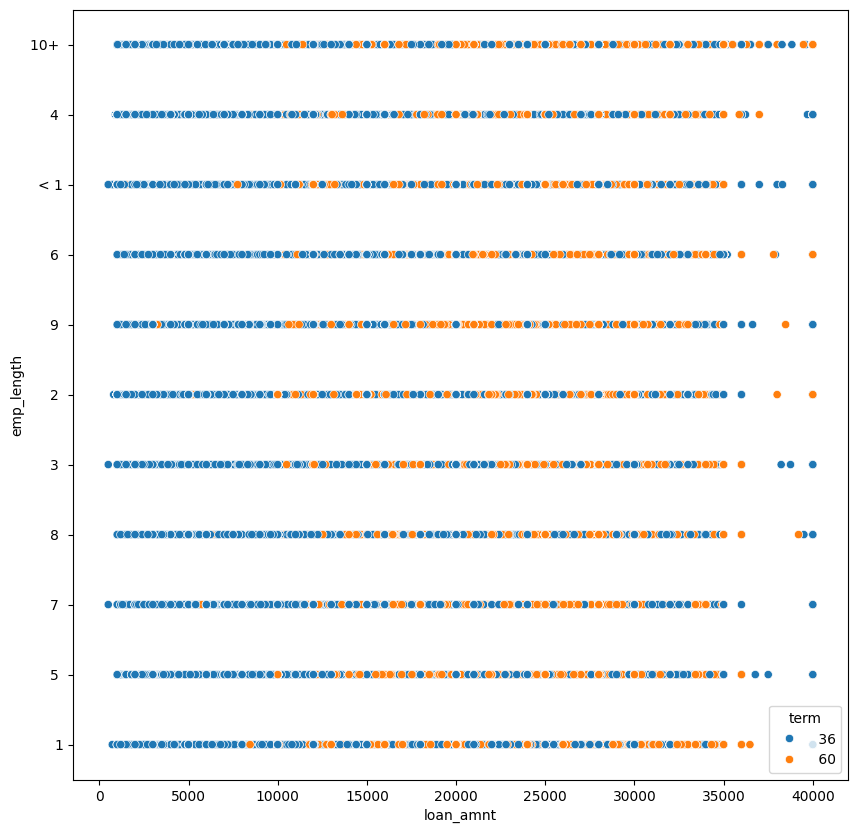

In [32]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df,x=df['loan_amnt'],y=df['emp_length'],hue="term")#,style="verification_status")

<Axes: xlabel='emp_length', ylabel='annual_inc'>

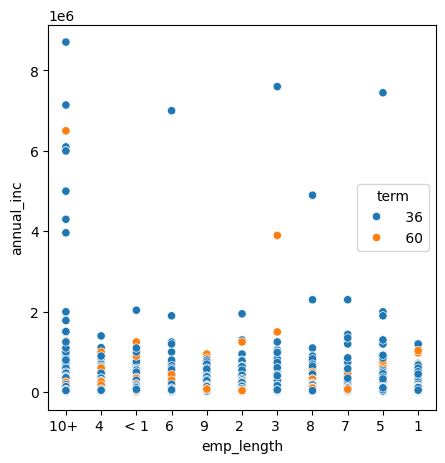

In [33]:
plt.figure(figsize=(5,5))
sns.scatterplot(data=df,x=df['emp_length'],y=df['annual_inc'],hue="term")

<Axes: xlabel='revol_bal', ylabel='annual_inc'>

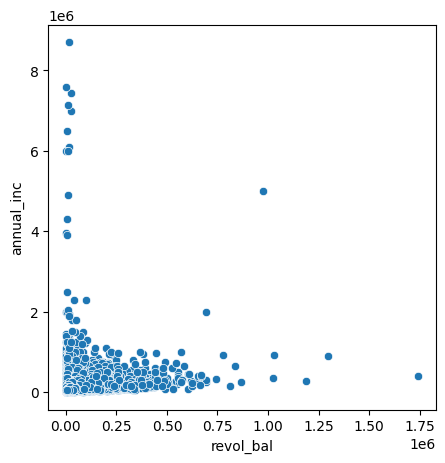

In [34]:
plt.figure(figsize=(5,5))
sns.scatterplot(data=df,x=df['revol_bal'],y=df['annual_inc'])

<Axes: xlabel='annual_inc', ylabel='loan_status'>

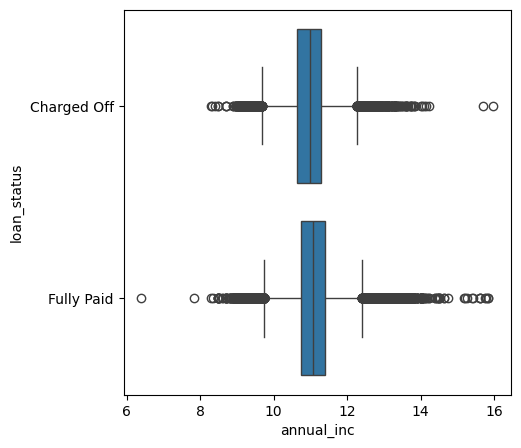

In [35]:
plt.figure(figsize=(5,5))
plt.subplot(1,1,1)
sns.boxplot(data=df,y=df['loan_status'],x=np.log(df['annual_inc']))

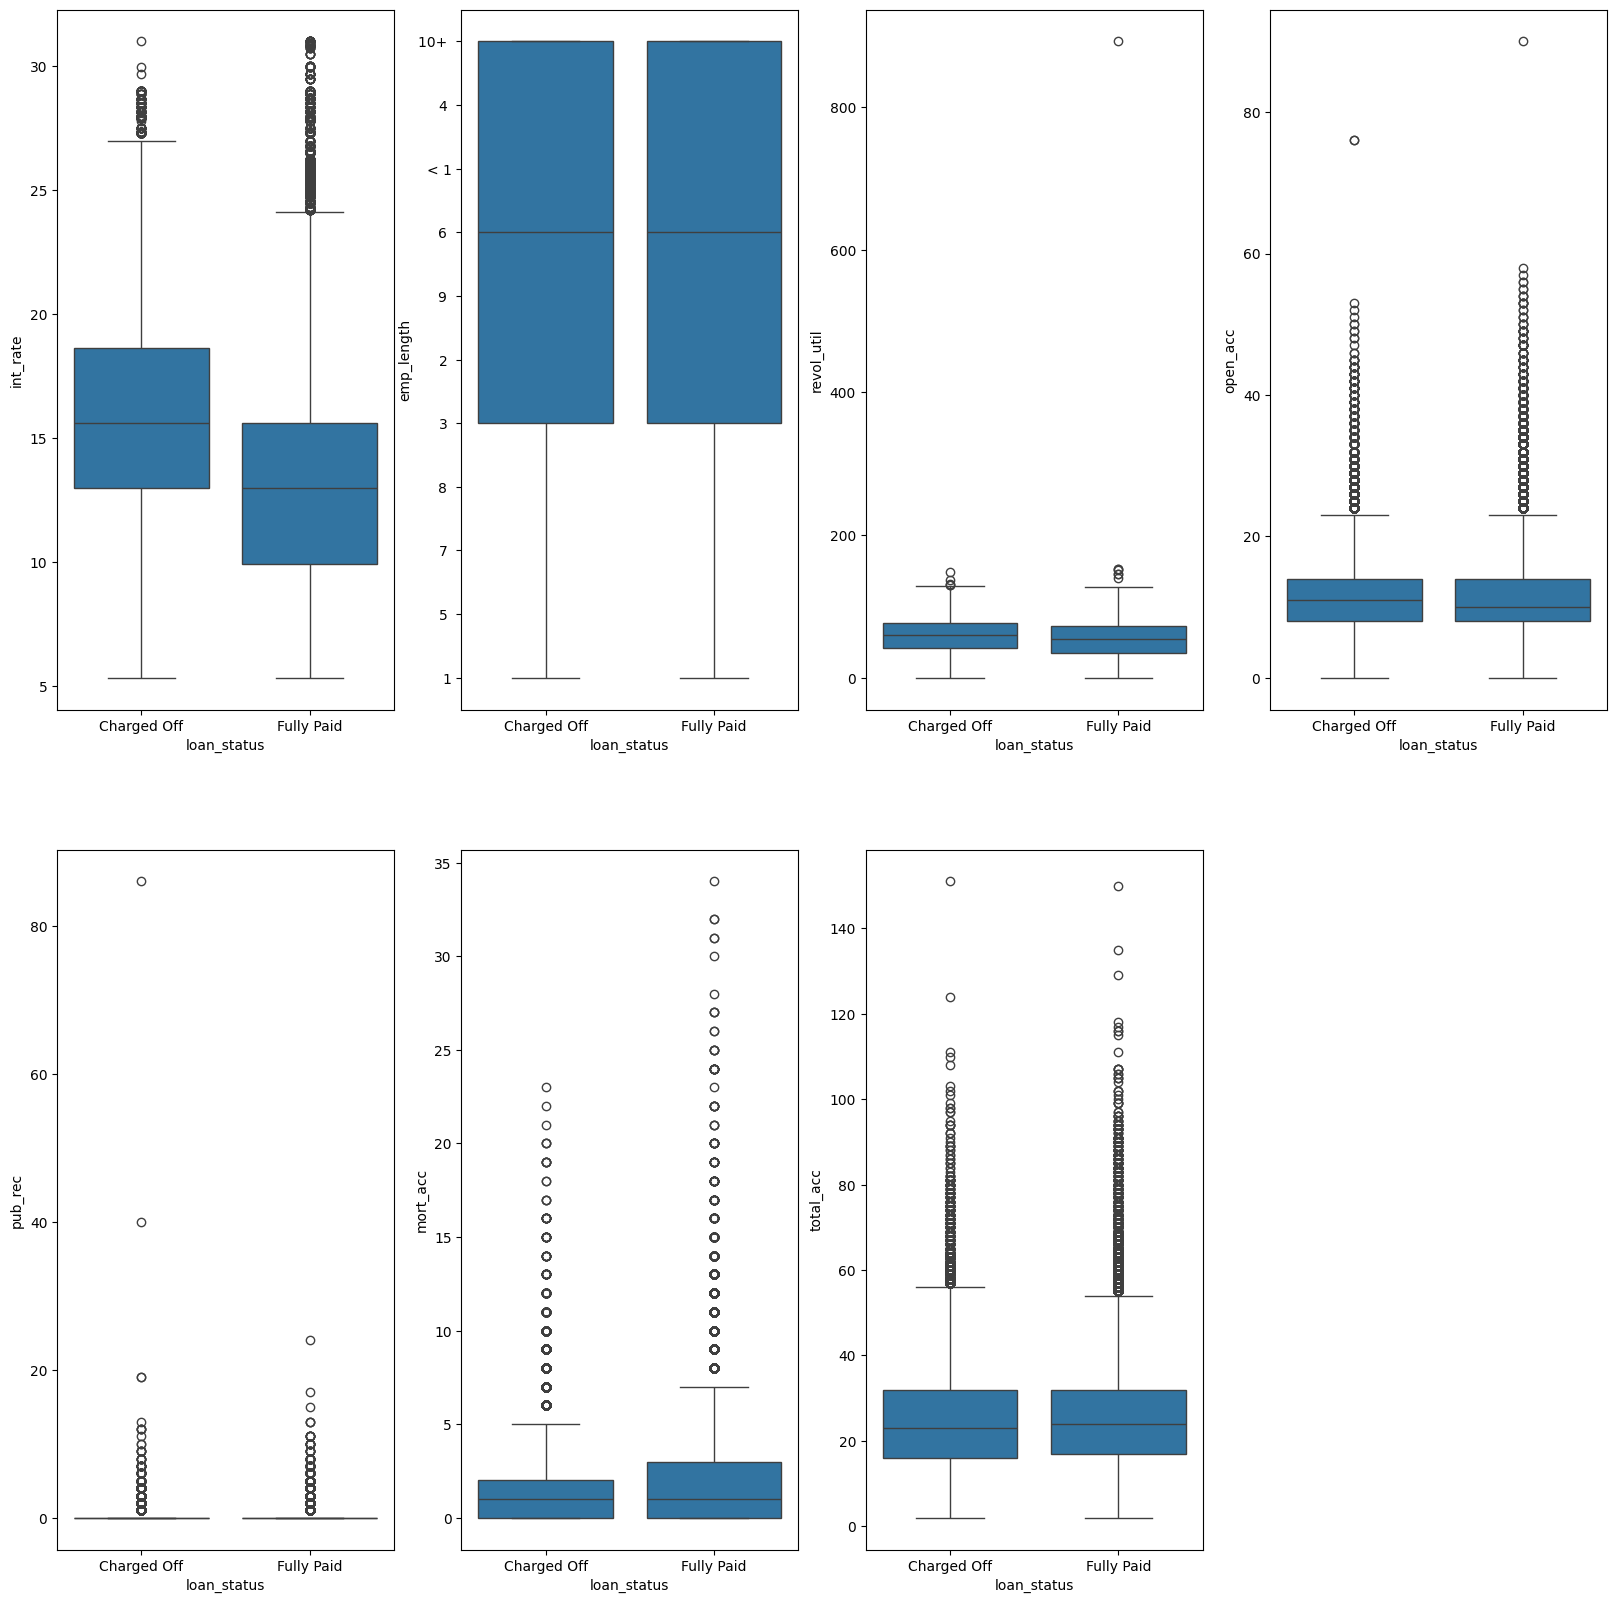

In [36]:
continuous_randam_variable=['int_rate',  'emp_length', "revol_util",'open_acc', 'pub_rec', 'mort_acc','total_acc']
count=0
plt.figure(figsize=(20,20))
for col in continuous_randam_variable:
       count+=1  
       plt.subplot(2,4,count)
       sns.boxplot(data=df,x=df["loan_status"],y=(df[col]))


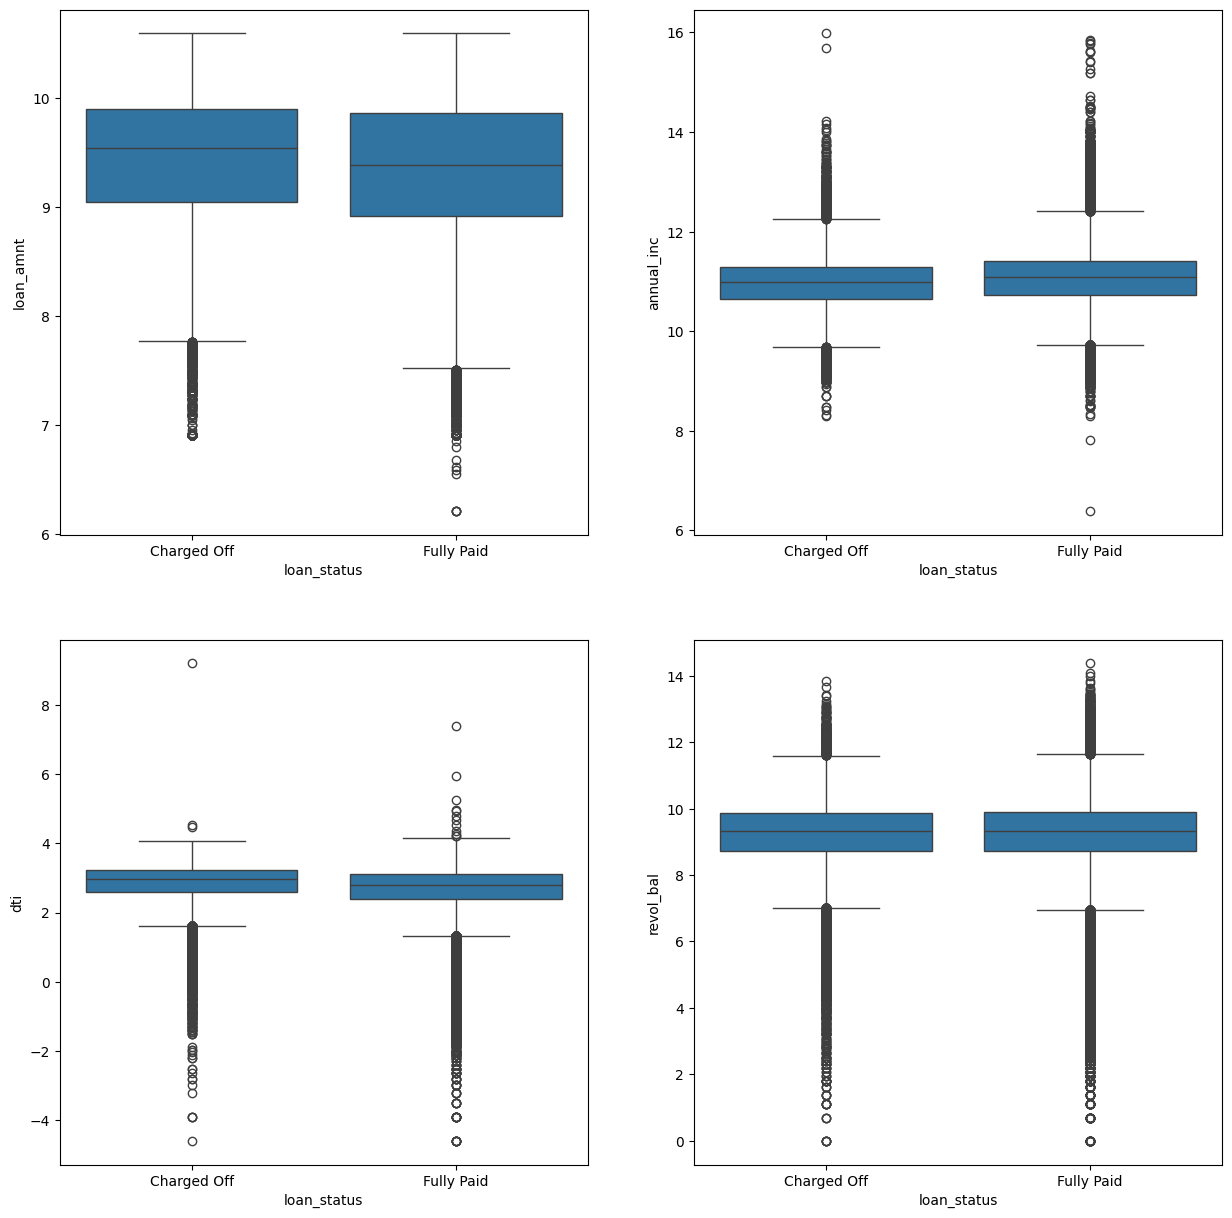

In [37]:
large_continuous_randam_variable=['loan_amnt', 'annual_inc', "dti","revol_bal"]
count=0
plt.figure(figsize=(15,15))
for col in large_continuous_randam_variable:
       count+=1  
       plt.subplot(2,2,count)
       sns.boxplot(data=df,x=df["loan_status"],y=np.log(df[col]))

- dti ,loan_amount

- Employee's experience has no impact on loan amount.
- Employee with more experience are getting high annual income.
- From boxplot, it is clear that medean, min, max and quartiles of annual income for full paid or charged off are same.
- Charged off borrowers are paying higher rate of interest than fully paid off borrowers. However, fully paid off have more outliers than charged off. 
- Employee experience has no impact on loan status.
- Revol_util (Usage percentage of 'revolving' accounts) and and open_acc (number of credit active lines) both are low for fully paid than charged off.
- First and second quartiles are same but third quartile and maximum number of Mort_acc (number of mortgages) are high for fully paid than charged off.
- Total_acc( Total number of borrower's credit lines) are slightly high for fully paid  than charged off.
- Laon amount is low but annual income is more for fully paid than cahrged off. 
- Dti is low for fully paid off while Revol_bal is same for both calsses.

# Heatmap

<Axes: >

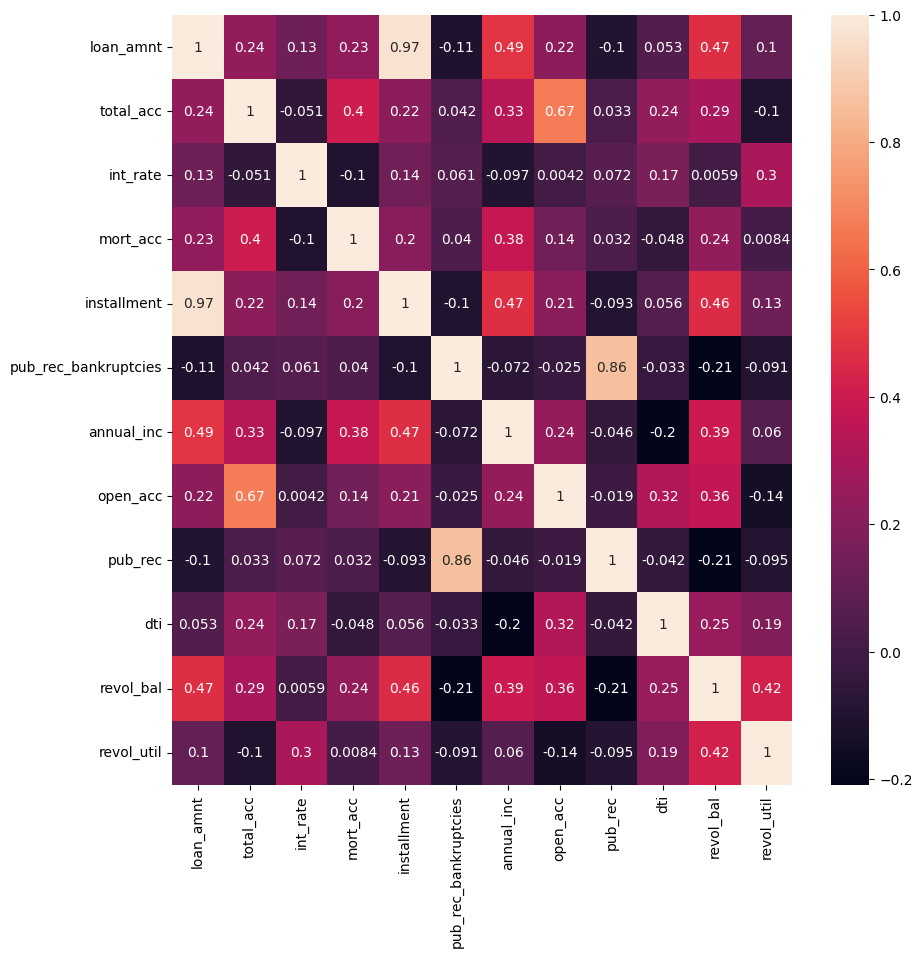

In [26]:
plt.figure(figsize=(10,10))
numeric_randam_variable=df[['loan_amnt', 'total_acc', 'int_rate', 'mort_acc','installment','pub_rec_bankruptcies', 'annual_inc','open_acc', 'pub_rec', 'dti', 'revol_bal',"revol_util"]]
sns.heatmap(numeric_randam_variable.corr(method="spearman"),annot=True)

In [28]:
df.drop("installment",axis = 1,inplace=True)

- Q2 Comment about the correlation between Loan Amount and Installment features. 
- Installment and loan amount are highly coreelated (.97). 
- Remove intallment column , since it has very high correlation with loan_amount.
- pub_rec and pub_rec_bankruptcies are higher correlated. Borrowers having more negative public records have high chances to be bankrupt.


# Probablity and Statistic ( Categorical features impact on laon status)

In [28]:
categorical_data=['term', 'grade', 'sub_grade', 'emp_title', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'initial_list_status', 'application_type',"address_pin_code"]

In [27]:
def cross_tab(col):
    return pd.crosstab(columns=df["loan_status"],index=df[col],normalize="index",margins=True)
categorical_data_ex_loan=['term', 'grade', 'sub_grade', 'emp_title', 'home_ownership', 'verification_status', 'purpose', 'initial_list_status', 'application_type',"address_pin_code"]
for col in categorical_data_ex_loan:
     print(cross_tab(col))
     print("\n")
    

loan_status  Charged Off  Fully Paid
term                                
 36             0.157746    0.842254
 60             0.319415    0.680585
All             0.196129    0.803871


loan_status  Charged Off  Fully Paid
grade                               
A               0.062879    0.937121
B               0.125730    0.874270
C               0.211809    0.788191
D               0.288678    0.711322
E               0.373634    0.626366
F               0.427880    0.572120
G               0.478389    0.521611
All             0.196129    0.803871


loan_status  Charged Off  Fully Paid
sub_grade                           
A1              0.028677    0.971323
A2              0.048186    0.951814
A3              0.058056    0.941944
A4              0.070239    0.929761
A5              0.084908    0.915092
B1              0.098582    0.901418
B2              0.108513    0.891487
B3              0.123354    0.876646
B4              0.138393    0.861607
B5              0.155037    0.8449

In [ ]:
count=0
plt.figure(figsize=(5,5))
for col in categorical_data_ex_loan:
     count+=1
     plt.subplot(10,1,count)
     pd.crosstab(columns = df["loan_status"],
                 index=df[col], 
                 normalize="index").plot(kind="bar")
        

In [ ]:
pd.crosstab(columns = df["loan_status"],
           index=pd.qcut(df["int_rate"],20), 
           normalize="index").plot(kind="bar")

- Higher rate of interest shows high percentage of charged off borrowers.
- 

In [ ]:
pd.crosstab(columns = df["loan_status"],
           index=pd.qcut(df["total_acc"],10), 
           normalize="index").plot(kind="bar")

In [ ]:
df.groupby(by = "loan_status")["int_rate"].describe()

In [ ]:
pd.crosstab(columns = df["loan_status"],
                 index=df["grade"], 
                 normalize="index").plot(kind="bar")
        

-Q 4 People with grades ‘A’ are more likely to fully pay their loan. (T/F)
- T

- probability of loan_status as fully_paid decreases with grade is E,F,G.
- We can conclude the relationship exists  between loan_status and LoanTap assigned loan grade
- Similar pattern is observed for sub_grade as grade .  

# Data Preprocessing 
- Duplicate value check
- Missing value treatment
- Outlier treatment
- Feature engineering
- Data preparation for modeling

# Duplicate value check

In [29]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
396025    False
396026    False
396027    False
396028    False
396029    False
Length: 396030, dtype: bool

In [30]:
len(df.columns)==df.columns.nunique()

True

- No duplicate rows and columns

In [31]:
#dropping unimportant columns
df.drop(["issue_d","earliest_cr_line","initial_list_status"],axis = 1, inplace=True)

# Missing value treatment

In [32]:
# Features with null values and their counts
df0=df.columns[df.isna().any()].tolist()
df[df0].isna().sum()

emp_title               22927
emp_length              18301
revol_util                276
mort_acc                37795
pub_rec_bankruptcies      535
dtype: int64

In [33]:
# Null values of pub_rec_bankruptcies are filled by 0 (top fequency).
df["pub_rec_bankruptcies"].fillna(0,inplace=True)  

In [34]:
# Replace null values and percentage more than 100 =0
df["revol_util"]=df["revol_util"].fillna(0)
df["revol_util"][df["revol_util"]>=100]=0

In [35]:
# Replace null values by 0.(most frequent) and outliers more than 11 as 0.
df["mort_acc"].fillna(0,inplace=True)
df["mort_acc"][df["mort_acc"]>11]=0

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   loan_amnt             396030 non-null  float64 
 1   term                  396030 non-null  category
 2   int_rate              396030 non-null  float64 
 3   grade                 396030 non-null  category
 4   sub_grade             396030 non-null  category
 5   emp_title             373103 non-null  category
 6   emp_length            377729 non-null  object  
 7   home_ownership        396030 non-null  category
 8   annual_inc            396030 non-null  float64 
 9   verification_status   396030 non-null  category
 10  loan_status           396030 non-null  category
 11  purpose               396030 non-null  category
 12  dti                   396030 non-null  float64 
 13  open_acc              396030 non-null  int64   
 14  pub_rec               396030 non-nul

In [37]:
categorical_ex_initial_list_data=['term', 'grade', 'sub_grade', 'emp_title', 'home_ownership', 'verification_status', 'loan_status', 'purpose',  'application_type',"address_pin_code"]
def data_categorical_to_object__type(col):
     return col.astype("object")
for col in categorical_ex_initial_list_data:
    df[col]=data_categorical_to_object__type(df[col])

In [38]:
# Replace null values with a new class "Others"
df["emp_title"].fillna("NaN",inplace=True)
df["emp_title"].replace("NaN","Others",inplace=True) 

In [39]:
df["emp_title"].value_counts(dropna=False)

emp_title
Others                     22927
Teacher                     4389
Manager                     4250
Registered Nurse            1856
RN                          1846
                           ...  
Postman                        1
McCarthy & Holthus, LLC        1
jp flooring                    1
Histology Technologist         1
Gracon Services, Inc           1
Name: count, Length: 173106, dtype: int64

In [40]:
# Reeplace null values with the kost frequent value
df["emp_length"].fillna("10+",inplace=True)

In [41]:
# Feature Engineering
# Replace target variable by 0 or 1
df["loan_status"].replace({"Fully Paid":0,
                          "Charged Off" : 1},inplace=True)

In [42]:
target_enc = ['grade', 'sub_grade',"term", 'emp_title', 'home_ownership', 'purpose',"address_pin_code","verification_status","emp_length","application_type"]
for col in target_enc:
    from category_encoders import TargetEncoder
    TEncoder = TargetEncoder()
    df[col] = TEncoder.fit_transform(df[col],df["loan_status"])
df

,loan_amnt,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,application_type,mort_acc,pub_rec_bankruptcies,address_pin_code
0,10000.0,0.157746,11.44,0.125730,0.138393,0.247140,0.184186,0.226622,117000.0,0.146360,0,0.189233,26.24,16,0,36369.0,41.8,25,0.196087,0.0,0.0,0.193784
1,8000.0,0.157746,11.99,0.125730,0.155037,0.217322,0.192385,0.169552,65000.0,0.146360,0,0.207414,22.05,17,0,20131.0,53.3,27,0.196087,3.0,0.0,0.000000
2,15600.0,0.157746,10.49,0.125730,0.123354,0.191993,0.206872,0.226622,43057.0,0.214743,0,0.167118,12.79,13,0,11987.0,92.2,26,0.196087,0.0,0.0,0.000000
3,7200.0,0.157746,6.49,0.062879,0.048186,0.170611,0.189194,0.226622,54000.0,0.146360,0,0.167118,2.60,6,0,5472.0,21.5,13,0.196087,0.0,0.0,0.000000
4,24375.0,0.319415,17.27,0.211809,0.245067,0.300719,0.200470,0.169552,55000.0,0.223211,1,0.167118,33.95,13,0,24584.0,69.8,43,0.196087,1.0,0.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,0.319415,10.99,0.125730,0.138393,0.170611,0.193262,0.226622,40000.0,0.214743,0,0.207414,15.63,6,0,1990.0,34.3,23,0.196087,0.0,0.0,0.194903
396026,21000.0,0.157746,12.29,0.211809,0.173696,0.220430,0.192187,0.169552,110000.0,0.214743,0,0.207414,21.45,6,0,43263.0,95.7,8,0.196087,1.0,0.0,0.000000
396027,5000.0,0.157746,9.99,0.125730,0.098582,0.268003,0.184186,0.226622,56500.0,0.223211,0,0.207414,17.56,15,0,32704.0,66.9,23,0.196087,0.0,0.0,0.195630
396028,21000.0,0.319415,15.31,0.211809,0.197520,0.170611,0.184186,0.169552,64000.0,0.223211,0,0.207414,15.88,9,0,15704.0,53.8,20,0.196087,5.0,0.0,0.000000


In [43]:
# One-hot-encoding for other categorical data :
target_enc = ['term', 'verification_status', 'application_type']

In [44]:
df

,loan_amnt,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,application_type,mort_acc,pub_rec_bankruptcies,address_pin_code
0,10000.0,0.157746,11.44,0.125730,0.138393,0.247140,0.184186,0.226622,117000.0,0.146360,0,0.189233,26.24,16,0,36369.0,41.8,25,0.196087,0.0,0.0,0.193784
1,8000.0,0.157746,11.99,0.125730,0.155037,0.217322,0.192385,0.169552,65000.0,0.146360,0,0.207414,22.05,17,0,20131.0,53.3,27,0.196087,3.0,0.0,0.000000
2,15600.0,0.157746,10.49,0.125730,0.123354,0.191993,0.206872,0.226622,43057.0,0.214743,0,0.167118,12.79,13,0,11987.0,92.2,26,0.196087,0.0,0.0,0.000000
3,7200.0,0.157746,6.49,0.062879,0.048186,0.170611,0.189194,0.226622,54000.0,0.146360,0,0.167118,2.60,6,0,5472.0,21.5,13,0.196087,0.0,0.0,0.000000
4,24375.0,0.319415,17.27,0.211809,0.245067,0.300719,0.200470,0.169552,55000.0,0.223211,1,0.167118,33.95,13,0,24584.0,69.8,43,0.196087,1.0,0.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,0.319415,10.99,0.125730,0.138393,0.170611,0.193262,0.226622,40000.0,0.214743,0,0.207414,15.63,6,0,1990.0,34.3,23,0.196087,0.0,0.0,0.194903
396026,21000.0,0.157746,12.29,0.211809,0.173696,0.220430,0.192187,0.169552,110000.0,0.214743,0,0.207414,21.45,6,0,43263.0,95.7,8,0.196087,1.0,0.0,0.000000
396027,5000.0,0.157746,9.99,0.125730,0.098582,0.268003,0.184186,0.226622,56500.0,0.223211,0,0.207414,17.56,15,0,32704.0,66.9,23,0.196087,0.0,0.0,0.195630
396028,21000.0,0.319415,15.31,0.211809,0.197520,0.170611,0.184186,0.169552,64000.0,0.223211,0,0.207414,15.88,9,0,15704.0,53.8,20,0.196087,5.0,0.0,0.000000


In [45]:
df0=df.copy()

In [46]:
Numerical_columns=['loan_amnt',  'int_rate',  'annual_inc', 'revol_bal',"revol_util",'total_acc', 'mort_acc','open_acc', 'pub_rec','pub_rec_bankruptcies', 'dti']
for col in Numerical_columns:
    mean = df0[col].mean()
    std = df0[col].std()
    upper_limit = mean+3*std
    lower_limit = mean-3*std
    df0 = df0[(df0[col]<upper_limit) & (df0[col]>lower_limit)]
df0.shape

(365467, 22)

In [47]:
df=df0

In [48]:
# No null values
df.isnull().sum()
df

,loan_amnt,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,application_type,mort_acc,pub_rec_bankruptcies,address_pin_code
0,10000.0,0.157746,11.44,0.125730,0.138393,0.247140,0.184186,0.226622,117000.0,0.146360,0,0.189233,26.24,16,0,36369.0,41.8,25,0.196087,0.0,0.0,0.193784
1,8000.0,0.157746,11.99,0.125730,0.155037,0.217322,0.192385,0.169552,65000.0,0.146360,0,0.207414,22.05,17,0,20131.0,53.3,27,0.196087,3.0,0.0,0.000000
2,15600.0,0.157746,10.49,0.125730,0.123354,0.191993,0.206872,0.226622,43057.0,0.214743,0,0.167118,12.79,13,0,11987.0,92.2,26,0.196087,0.0,0.0,0.000000
3,7200.0,0.157746,6.49,0.062879,0.048186,0.170611,0.189194,0.226622,54000.0,0.146360,0,0.167118,2.60,6,0,5472.0,21.5,13,0.196087,0.0,0.0,0.000000
4,24375.0,0.319415,17.27,0.211809,0.245067,0.300719,0.200470,0.169552,55000.0,0.223211,1,0.167118,33.95,13,0,24584.0,69.8,43,0.196087,1.0,0.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,0.319415,10.99,0.125730,0.138393,0.170611,0.193262,0.226622,40000.0,0.214743,0,0.207414,15.63,6,0,1990.0,34.3,23,0.196087,0.0,0.0,0.194903
396026,21000.0,0.157746,12.29,0.211809,0.173696,0.220430,0.192187,0.169552,110000.0,0.214743,0,0.207414,21.45,6,0,43263.0,95.7,8,0.196087,1.0,0.0,0.000000
396027,5000.0,0.157746,9.99,0.125730,0.098582,0.268003,0.184186,0.226622,56500.0,0.223211,0,0.207414,17.56,15,0,32704.0,66.9,23,0.196087,0.0,0.0,0.195630
396028,21000.0,0.319415,15.31,0.211809,0.197520,0.170611,0.184186,0.169552,64000.0,0.223211,0,0.207414,15.88,9,0,15704.0,53.8,20,0.196087,5.0,0.0,0.000000


<Axes: >

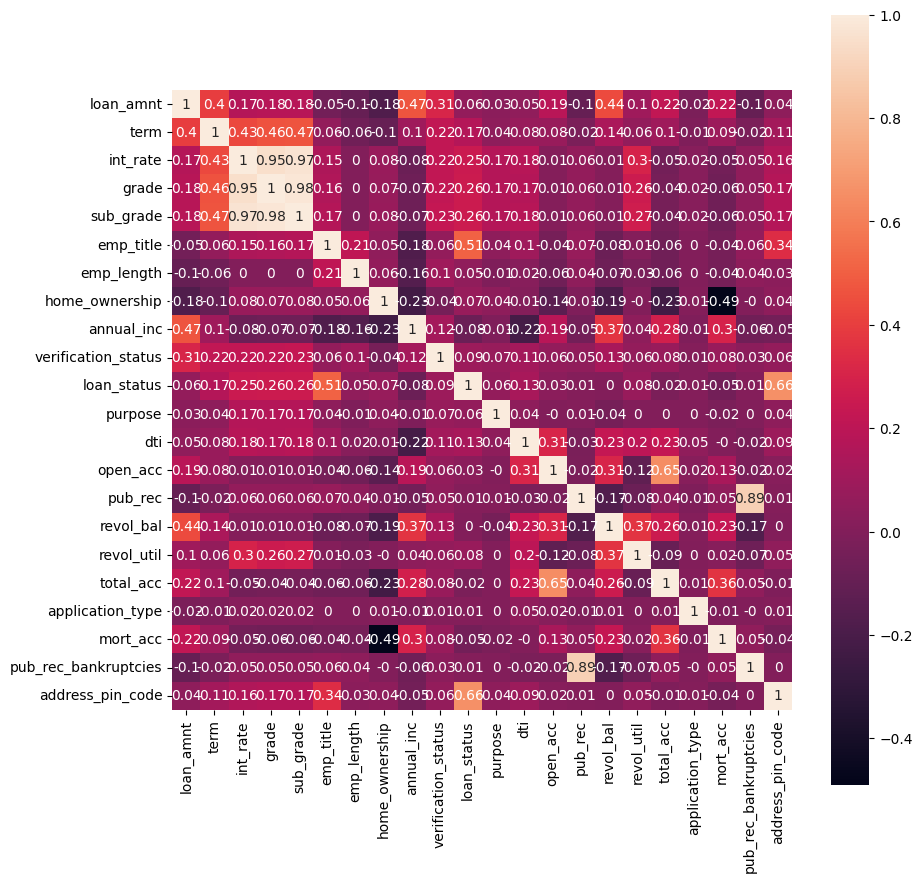

In [49]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr().round(2),annot=True,square=True)

<Axes: >

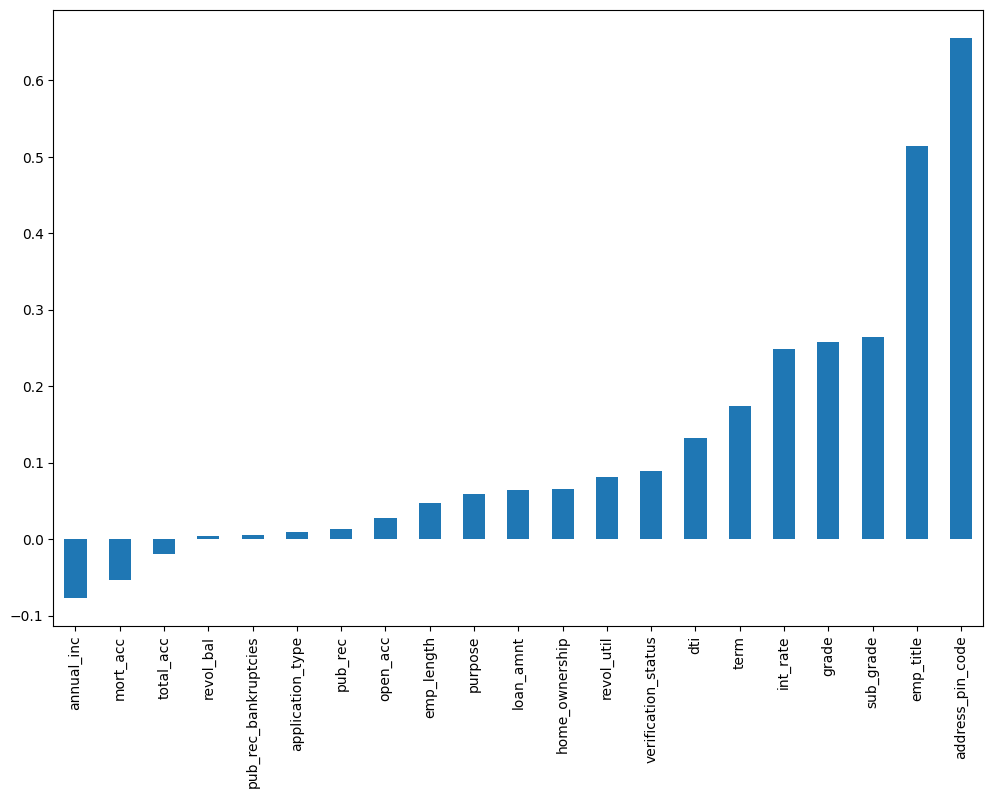

In [50]:
plt.figure(figsize=(12,8))

df.corr()["loan_status"].sort_values()[:-1].plot(kind = "bar")

# Data preparation for modeling:

In [51]:
X = df.drop("loan_status",axis = 1)
y = df["loan_status"]

In [52]:
X.shape,y.shape

((365467, 21), (365467,))

In [53]:
print(f"Before smote y_tarin: {y.value_counts()}")

Before smote y_tarin: loan_status
0    293628
1     71839
Name: count, dtype: int64


Clearly, the dataset is imbalanced. We will use smote to balance the dataset.

# Multicollinearity check

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
vifs = []

for i in range(X_train.shape[1]):
    
    vifs.append((variance_inflation_factor(exog = X_train,
                                   exog_idx=i)))
pd.DataFrame({ "coef_name : " : X.columns ,
             "vif : ": np.around(vifs,2)})

# Train-test-Split :

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_tr , X_test,  y_tr , y_test = train_test_split(X,y,
                                                      test_size=0.2,
                                                      random_state=42)
X_train , X_val,  y_train , y_val = train_test_split(X_tr,y_tr,
                                                      test_size=0.25,
                                                      random_state=42)

In [56]:
X_train.shape,X_val.shape,X_test.shape

((219279, 21), (73094, 21), (73094, 21))

In [57]:
y_tr.value_counts()

loan_status
0    234928
1     57445
Name: count, dtype: int64

In [58]:
# Balancing data for model without using cross validation
from imblearn.over_sampling import SMOTE
# Create an instance of SMOTE
smt = SMOTE()
X_tr_sm, y_tr_sm = smt.fit_resample(X_tr, y_tr)
print('After Oversampling')
#print(y_train_oversampled.value_counts())
y_tr_sm.value_counts()


After Oversampling


loan_status
0    234928
1    234928
Name: count, dtype: int64

In [59]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_tr_sm)
X_tr_sm=scaler.transform(X_tr_sm)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

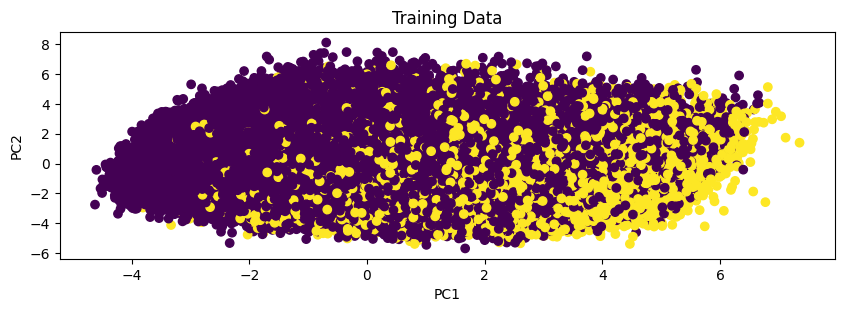

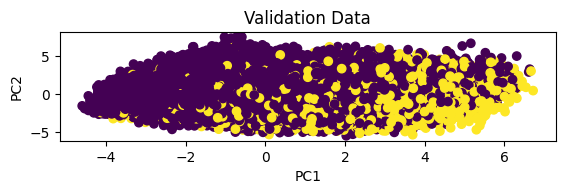

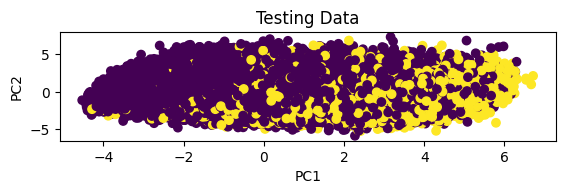

In [60]:
# Dataset visualization for tarin, test and val. balanced data
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
Datasets=[X_train,X_val,X_test]
Targets=[y_train,y_val,y_test]
Title=["Training Data", "Validation Data", "Testing Data"]
plt.figure(figsize=(10,10))
for i  in range(3):
    principalComponents = pca.fit_transform(Datasets[i])
    principalDf = pd.DataFrame(data = principalComponents
                 , columns = ['principal component 1', 'principal component 2'])
    plt.subplot(3,1,i+1)
    plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'], c = Targets[i])
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title(Title[i])
    plt.show()

- The statistics of our type of data is similar, so we are good to go.

# Model building
- Build the Logistic Regression model and comment on the model statistics

# Logistic Regression without cross validation

In [61]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(X_tr_sm, y_tr_sm)

LogisticRegression()

In [62]:
import numpy as np

In [63]:
model1.coef_

array([[ 9.78860462e-02,  2.21562956e-01, -1.42302068e-01,
         2.28549014e-02,  5.72064764e-01,  1.66788337e+00,
        -9.20069315e-02,  1.42310180e-01,  5.04542677e-02,
         5.61719847e-02,  5.08958438e-02,  1.90640572e-01,
         7.90995144e-02, -7.76923762e-01, -3.86410300e-02,
         1.25075641e-01, -4.65673913e-02,  6.56823606e-03,
        -6.29508926e-02,  6.13123635e-01,  2.28348260e+01]])

- model coefficients with column names

In [64]:
modelcofficient_columns = pd.DataFrame(data=model1.coef_,columns=X.columns,index=["Coefficient"]).T.sort_values("Coefficient")
modelcofficient_columns

,Coefficient
pub_rec,-0.776924
int_rate,-0.142302
emp_length,-0.092007
mort_acc,-0.062951
total_acc,-0.046567
revol_bal,-0.038641
application_type,0.006568
grade,0.022855
annual_inc,0.050454
purpose,0.050896


In [73]:
# Checking the Accuracy of Training, validation and Test dataset
from sklearn.metrics import accuracy_score, recall_score,precision_score ,f1_score
print(f'Training Accuracy:{model1.score(X_tr_sm,y_tr_sm)}')
# print(f'Test Accuracy:{accuracy_score(y_test,model1.predict(X_test))}')
print(f'Testing Accuracy:{model1.score(X_test,y_test)}')

Training Accuracy:0.9166468024245726
Test Accuracy:0.9070648753659671
Testing Accuracy:0.9070648753659671


- Performance accuracy on train and test data is high, with a variance of 1%.

- Let's check the accuracy with cross validation
- Hyperparameter tunning on the regularization parameter lambda.

In [75]:
# Balancing data for model 
from imblearn.over_sampling import SMOTE
# Create an instance of SMOTE
smt = SMOTE()
X_sm, y_sm = smt.fit_resample(X_train, y_train)
X_smv, y_smv = smt.fit_resample(X_val, y_val)
print('After Oversampling')
y_sm.value_counts(),y_smv.value_counts()

After Oversampling


(loan_status
 0    176285
 1    176285
 Name: count, dtype: int64,
 loan_status
 0    58643
 1    58643
 Name: count, dtype: int64)

In [76]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score,precision_score ,f1_score
train_scores = []
val_scores = []
scaler = StandardScaler()
for la in np.arange(0.01, 5000.0, 100): # range of values of Lambda
  scaled_lr = make_pipeline(scaler, LogisticRegression(C=1/la))
  scaled_lr.fit(X_sm, y_sm)
  train_score = accuracy_score(y_sm, scaled_lr.predict(X_sm))
  val_score = accuracy_score(y_smv, scaled_lr.predict(X_smv))
  train_scores.append(train_score)
  val_scores.append(val_score)

In [77]:
train_scores,val_scores

([0.8917406472473551,
  0.8911847292736195,
  0.8904784865416797,
  0.8897013359049267,
  0.889048983180645,
  0.8883172136029724,
  0.8875797713929149,
  0.886862183396205,
  0.88612757750234,
  0.8856368948010325,
  0.8851944294749978,
  0.8847321099356156,
  0.8843151714553138,
  0.883838670334969,
  0.8835181666052131,
  0.8830898828601412,
  0.8827778880789631,
  0.8825027654082878,
  0.8822021158918796,
  0.8819979011260175,
  0.8817171058229571,
  0.8814448194684743,
  0.8811782057463766,
  0.8809541367671668,
  0.8807470856851122,
  0.8805286893382874,
  0.880392546161046,
  0.8802507303514195,
  0.8801174234903707,
  0.8800096434750546,
  0.8797969197606149,
  0.8796607765833735,
  0.8795444876194798,
  0.8794310349717787,
  0.879326091272655,
  0.8792580196840344,
  0.8791162038744079,
  0.8790282780724396,
  0.8789204980571234,
  0.8788240633065774,
  0.878741810136994,
  0.8786510480188331,
  0.8785659585330573,
  0.8785035595768216,
  0.8783844342967354,
  0.87833621692146

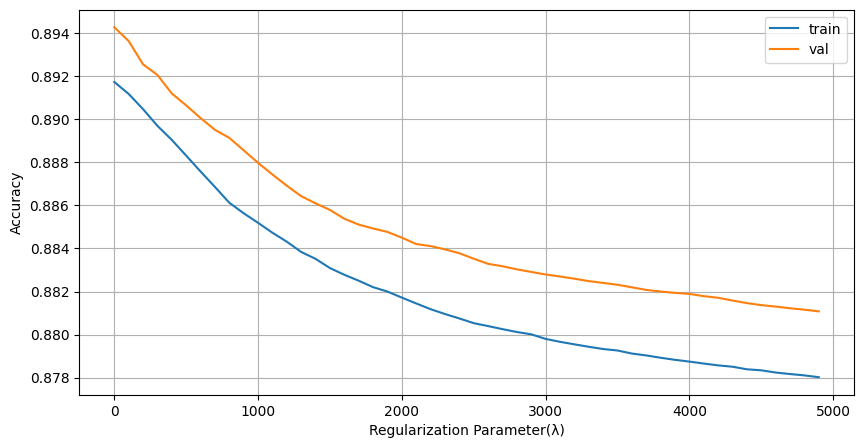

In [78]:
plt.figure(figsize=(10,5))
plt.plot(list(np.arange(0.01, 5000.0, 100)), train_scores, label="train")
plt.plot(list(np.arange(0.01, 5000.0, 100)), val_scores, label="val")
plt.legend(loc='upper right')

plt.xlabel("Regularization Parameter(λ)")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

In [79]:
model2 =LogisticRegression(C=1/100)
model2.fit(X_sm, y_sm)

LogisticRegression(C=0.01)

In [80]:
model2cofficient_columns = pd.DataFrame(data=np.abs(model2.coef_),columns=X.columns,index=["Coefficients"]).T.sort_values("Coefficients",ascending=False)
model2cofficient_columns

,Coefficients
address_pin_code,6.958448
emp_title,1.543394
sub_grade,0.487299
term,0.202319
open_acc,0.181599
revol_util,0.159080
loan_amnt,0.153992
dti,0.151783
home_ownership,0.107337
total_acc,0.087855


In [81]:
# Checking the Accuracy of Training, validation and Test dataset
print(f'Model2 Training Accuracy :{model2.score(X_sm,y_sm)}')
print(f'Model2 Validation Accuracy :{model2.score(X_smv,y_smv)}')
print(f'Model2 Test Accuracy : {model2.score(X_test,y_test)}')
print("\n")
# Checking the Accuracy of Training, validation and Test dataset
print(f'Model1 Training Accuracy:{model1.accuracy_score(X_tr_sm,y_tr_sm)}')
print(f'Model1 Test Accuracy:{model1.score(X_test,y_test)}')


Model2 Training Accuracy :0.8913208724508608
Model2 Validation Accuracy :0.8938406970993981
Model2 Test Accuracy : 0.8925493200536295




AttributeError: 'LogisticRegression' object has no attribute 'accuracy_score'

- Model has high accuracy for training, validation, and testing data with a variance of .14%. So, it is a good model. However, the performance of the model1  is slightly better (2.6%) than model2 but, model 1 has more variance than model 2. So, Model 2 is a better model than Model 1.

<Axes: xlabel='Feature'>

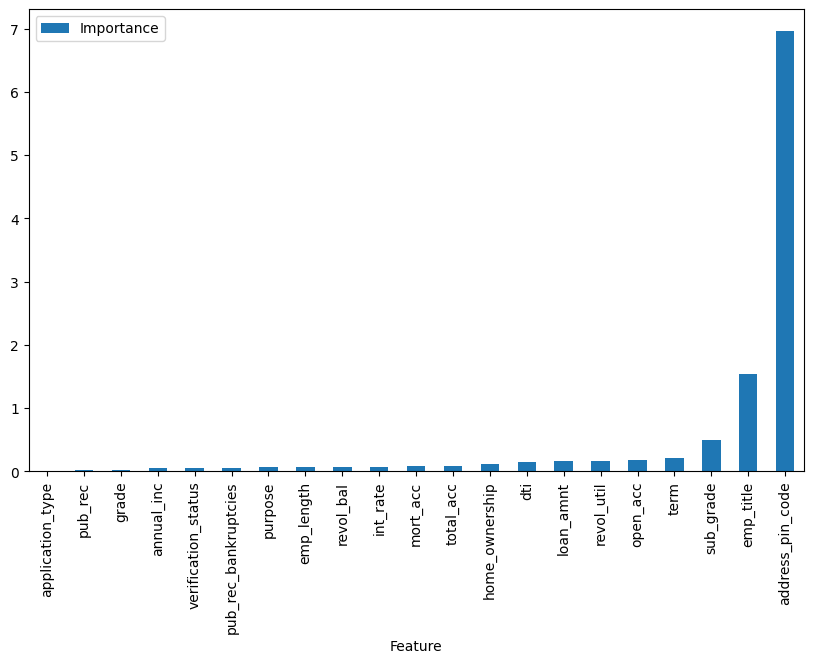

In [82]:
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(model2.coef_[0])})##model1.coef_ is a 2D array
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='bar', figsize=(10, 6))

# Results Evaluation 
- ROC AUC Curve & comments 
- Precision Recall Curve & comments 
- Classification Report (Confusion Matrix etc) 

Each metric offers a unique perspective on the model's performance – ROC AUC provides a holistic view, Precision and Recall offer insights into the model's ability to avoid false positives and negatives, and F1 Score provides a balanced measure. It's essential to evaluate these metrics collectively to gain a comprehensive understanding of the model's strengths and weaknesses.








# Roc and AU-ROC curve 

In [94]:
from sklearn.metrics import roc_curve, roc_auc_score,auc

In [95]:
def prob(data):
    return model2.predict_proba(data)

In [96]:
train_fpr, train_tpr, train_thr = roc_curve(y_sm,prob(X_sm)[:,1])
val_fpr, val_tpr, val_thr = roc_curve(y_smv,prob(X_smv)[:,1])
test_fpr, test_tpr, test_thr = roc_curve(y_test,prob(X_test)[:,1])
print(f" Training accuracy :{auc(train_fpr, train_tpr)}")
print(f" Validating accuracy :{auc(val_fpr, val_tpr)}")
print(f" Testing accuracy :{auc(test_fpr, test_tpr)}")

 Training accuracy :0.9609411666038237
 Validating accuracy :0.9614772378073516
 Testing accuracy :0.9555876158886002


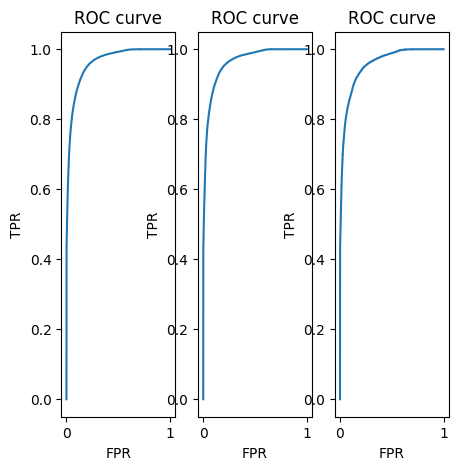

In [91]:
# AUC
plt.figure(figsize=(5,5))
data_fpr=[train_fpr,val_fpr,test_fpr]
data_tpr=[train_tpr,val_tpr, test_tpr]
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.plot(data_fpr[i],data_tpr[i])
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title("ROC curve")


In [92]:
train_fpr, train_tpr, train_thr = roc_curve(y_sm,prob(X_sm)[:,1])
val_fpr, val_tpr, val_thr = roc_curve(y_smv,prob(X_smv)[:,1])
test_fpr, test_tpr, test_thr = roc_curve(y_test,prob(X_test)[:,1])
print(f" Training accuracy :{auc(train_fpr, train_tpr)}")
print(f" Validating accuracy :{auc(val_fpr, val_tpr)}")
print(f" Testing accuracy :{auc(test_fpr, test_tpr)}")

NameError: name 'auc' is not defined

In [93]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
precision, recall, thr = precision_recall_curve(y_test,prob(data))
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision recall curve")
auc(recall, precision)

NameError: name 'probabilites' is not defined

From a bank's perspective, the primary focus is on minimizing both the False Negative (FN) rate and False Positive (FP) rate while simultaneously maximizing the True Positive (TP) rate. This approach ensures a high precision level, where the emphasis is on accurately identifying and approving creditworthy customers while minimizing the risk of overlooking potential good borrowers or approving loans with a higher likelihood of default.

In [83]:
precision, recall, thr

(array([0.19692451, 0.1969272 , 0.1969299 , ..., 1.        , 1.        ,
        1.        ]),
 array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        1.38946783e-04, 6.94733917e-05, 0.00000000e+00]),
 array([2.36429054e-05, 2.54130727e-05, 3.29503436e-05, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]))

Inferences and Report :
396030 data points , 26 features , 1 label.

80% belongs to the class 0 : which is loan fully paid.

20% belongs to the class 1 : which were charged off.

Loan Amount distribution / media is slightly higher for Charged_off loanStatus.

Probability of CHarged_off status is higher in case of 60 month term.

Interest Rate mean and media is higher for Charged_off LoanStatus.

Probability of Charged_off LoanStatus is higher for Loan Grades are E ,F, G.

G grade has the highest probability of having defaulter.

Similar pattern is visible in sub_grades probability plot.

Employement Length has overall same probability of Loan_status as fully paid and defaulter.

That means Defaulters has no relation with their Emoployement length.

For those borrowers who have rental home, has higher probability of defaulters.

borrowers having their home mortgage and owns have lower probability of defaulter.

Annual income median is lightly higher for those who's loan status is as fully paid.

Somehow , verified income borrowers probability of defaulter is higher than those who are not verified by loan tap.

Most of the borrowers take loans for dept-consolidation and credit card payoffs.

the probability of defaulters is higher in the small_business owner borrowers.

debt-to-income ratio is higher for defaulters.

number of open credit lines in the borrowers credit file is same as for loan status as fully paid and defaulters.

Number of derogatory public records increases , the probability of borrowers declared as defaulters also increases

aspecially for those who have higher than 12 public_records.

Total credit revolving balance is almost same for both borrowers who had fully paid loan and declared defaulter

but Revolving line utilization rate is higher for defaulter borrowers.

Application type Direct-Pay has higher probability of defaulter borrowers than individual and joint.

Number of public record bankruptcies increasaes , higher the probability of defaulters.

Most important features/ data for prediction , as per Logistic Regression, Decision tree classifier and Random Forest model are : Employee Title, Loan Grade and Sub-Grade, Interest rate and dept-to-income ratio.



Actionable Insights & Recommendations
We should try to keep the precision higher as possible compare to recall , and keep the false positive low.

that will help not to missout the opportopportunity to finance more individuals and earn interest on it. This we can achieve by setting up the higher threshold.

Giving loans to those even having slightly higher probability of defaulter, we can maximise the earning , by this risk taking method.

and Since NPA is a real problem in the industry , Company should more investigate and check for the proof of assets. Since it was observed in probability plot, verified borrowers had higher probability of defaulters than non-varified.

Giving loans to those who have no mortgage house of any owned property have higher probability of defaulter , giving loan to this category borrowers can be a problem of NPA.